#### Q1

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
              'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle = True, random_state=42, remove=('headers','footers'))

In [ ]:
# from project 1 
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
X_train_tfidf = tfidf_vector.fit_transform(dataset.data)
print(X_train_tfidf.shape)

(7882, 23522)


#### Q2

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score



In [5]:
# provided plotmat.py
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

In [ ]:
K_Means = KMeans(n_clusters=2, random_state=0, max_iter=10000, n_init=1000)
y_pred = K_Means.fit_predict(X_train_tfidf)



In [ ]:
y = []
for i in dataset.target:
  if i >= 4:
    y.append(1)
  else:
    y.append(0)
con_mat = contingency_matrix(y,y_pred)
print(con_mat)

[[ 708 3195]
 [3923   56]]


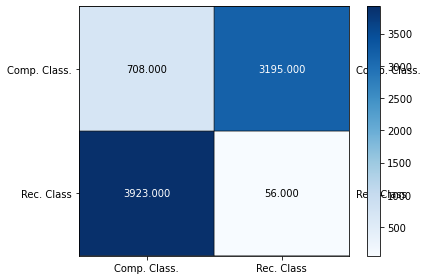

In [ ]:
plot_mat(con_mat,size=(6,4),xticklabels = ['Comp. Class.','Rec. Class'],yticklabels = ['Comp. Class.','Rec. Class'])

#### Q3

In [ ]:
print("Homogeneity score is: ", homogeneity_score(y,y_pred))
print("Completeness score is: ", completeness_score(y,y_pred))
print("V-measure score is: ", v_measure_score(y,y_pred))
print("Adjusted rand index score is: ", adjusted_rand_score(y,y_pred))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y,y_pred))

Homogeneity score is:  0.5856643179006807
Completeness score is:  0.5989373024674414
V-measure score is:  0.5922264509580224
Adjusted rand index score is:  0.6498185586076941
Adjusted mutual information score is:  0.592188700546637


#### Q4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD


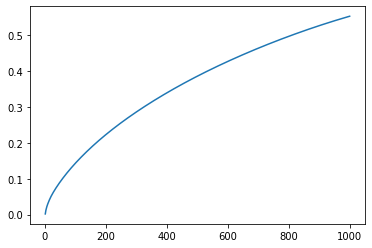

In [ ]:
T_SVD = TruncatedSVD(n_components=1000,random_state=0)
X_train_SVD = T_SVD.fit_transform(X_train_tfidf)
r = np.linspace(1,1000,1000)
plt.plot(r,np.cumsum(T_SVD.explained_variance_ratio_))

#### Q5

In [ ]:
# svd
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
FiveMeasures = []
for _ in range(5):
  FiveMeasures.append([]) 

for i in r:
  svd = TruncatedSVD(n_components=i,random_state=0).fit_transform(X_train_tfidf)
  
  y_pred_svd = K_Means.fit_predict(svd)

  FiveMeasures[0].append(homogeneity_score(y,y_pred_svd))
  FiveMeasures[1].append(completeness_score(y,y_pred_svd))
  FiveMeasures[2].append(v_measure_score(y,y_pred_svd))
  FiveMeasures[3].append(adjusted_rand_score(y,y_pred_svd))
  FiveMeasures[4].append(adjusted_mutual_info_score(y,y_pred_svd))

In [ ]:
print("SVD five measures scores:")
for i in range(5):
  print(FiveMeasures[i])

SVD five measures scores:
[0.018956544515354657, 0.5306083637551189, 0.5368589954067441, 0.5001780588611179, 0.5167405723867481, 0.5238667289842572, 0.5248419957826616, 0.5407237773552191, 0.5445078499988873, 0.5494560245106322, 0.560643151314536, 0.5682424819864598, 0.571596401920025, 0.5826077785482765]
[0.019260434831635448, 0.5480252559903095, 0.5536026191126241, 0.5258988505036355, 0.5399023419630755, 0.5421683105833416, 0.5431776488810497, 0.5573273987946843, 0.5615339742131421, 0.5663717464281504, 0.5769312303003623, 0.5832066461371069, 0.5863564381085674, 0.59616923052881]
[0.01910728144974337, 0.539176193017473, 0.5451022612700448, 0.5127160816142957, 0.5280676024607878, 0.5328604199340778, 0.5338524300141092, 0.5489000564736507, 0.5528898642109833, 0.5577856660185749, 0.5686705823810745, 0.5756273273696628, 0.5788823494007289, 0.5893104944575848]
[0.025920756456215145, 0.5871684750563637, 0.5949729305011748, 0.5339798662029507, 0.5564659132168958, 0.5782570418071372, 0.579029

In [ ]:
print(len(FiveMeasures[0]))

14


Text(0.5, 1.0, 'Scores for SVD')

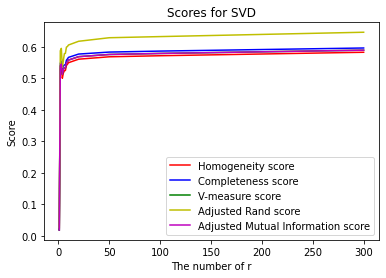

In [ ]:
plt.plot(r, FiveMeasures[0], 'r', label='Homogeneity score')
plt.plot(r, FiveMeasures[1], 'b', label='Completeness score')
plt.plot(r, FiveMeasures[2], 'g', label='V-measure score')
plt.plot(r, FiveMeasures[3],'y',label='Adjusted Rand score')
plt.plot(r, FiveMeasures[4],'m',label='Adjusted Mutual Information score')
plt.legend(loc='best')
plt.xlabel("The number of r"); plt.ylabel("Score"); plt.title("Scores for SVD")

In [ ]:
# nmf
from sklearn.decomposition import NMF

r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
FiveMeasures_nmf = []
for _ in range(5):
  FiveMeasures_nmf.append([]) 

for i in r:
  print("r = ", i)
  nmf = NMF(n_components=i,init='random',random_state=0).fit_transform(X_train_tfidf)
  y_pred_nmf = K_Means.fit_predict(nmf)

  FiveMeasures_nmf[0].append(homogeneity_score(y,y_pred_nmf))
  FiveMeasures_nmf[1].append(completeness_score(y,y_pred_nmf))
  FiveMeasures_nmf[2].append(v_measure_score(y,y_pred_nmf))
  FiveMeasures_nmf[3].append(adjusted_rand_score(y,y_pred_nmf))
  FiveMeasures_nmf[4].append(adjusted_mutual_info_score(y,y_pred_nmf))


r =  1
r =  2
r =  3
r =  4
r =  5


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


r =  6
r =  7


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


r =  8


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


r =  9


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


r =  10
r =  20
r =  50
r =  100


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


r =  300


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
print("NMF five measures scores:")
for i in range(5):
  print(FiveMeasures_nmf[i])

print(len(FiveMeasures_nmf[0]))

NMF five measures scores:
[0.018956544515354657, 0.5031175985833951, 0.47020342989998204, 0.1938179737648065, 0.48491336475865354, 0.4857255023772624, 0.49710984235726485, 0.5065163125780371, 0.1297996356116252, 0.21108590418554873, 0.06009162946762217, 0.0021303952018709594, 0.007371989041014888, 0.011283457872498062]
[0.019260434831635448, 0.5271405199911028, 0.500375235543389, 0.2904705742078986, 0.51336833425069, 0.5092185050521937, 0.5236436091941672, 0.5221100793365103, 0.16841251478403915, 0.3071001186630543, 0.18814158507842646, 0.09591019434272455, 0.11923555537906533, 0.1288020575537847]
[0.01910728144974337, 0.51484898347782, 0.48482036617204083, 0.23249948142258278, 0.4987353100213795, 0.497194640782461, 0.5100318624879726, 0.5141949967920426, 0.1466062534501179, 0.2501978184093928, 0.09108961859643999, 0.004168204593370178, 0.013885479124960926, 0.020749220015740855]
[0.025920756456215145, 0.5417972171115462, 0.494316445796442, 0.11362036275980171, 0.5123207178628015, 0.52

Text(0.5, 1.0, 'Scores for NMF')

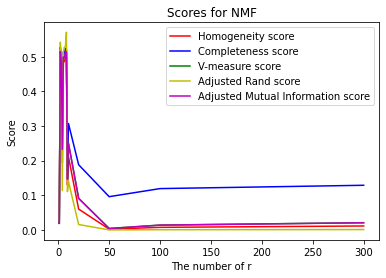

In [ ]:
r = r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
plt.plot(r, FiveMeasures_nmf[0], 'r', label='Homogeneity score')
plt.plot(r, FiveMeasures_nmf[1], 'b', label='Completeness score')
plt.plot(r, FiveMeasures_nmf[2], 'g', label='V-measure score')
plt.plot(r, FiveMeasures_nmf[3], 'y', label='Adjusted Rand score')
plt.plot(r, FiveMeasures_nmf[4], 'm', label='Adjusted Mutual Information score')
plt.legend(loc='best')
plt.xlabel("The number of r"); plt.ylabel("Score"); plt.title("Scores for NMF")

#### Q8

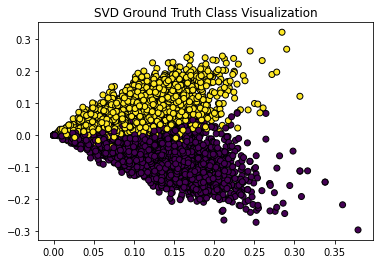

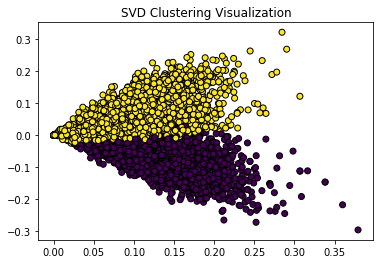

In [ ]:
# svd r = 20
svd1_20 = TruncatedSVD(n_components = 20, random_state = 0) 
X_dataset_svd_20 = svd1_20.fit_transform(X_train_tfidf)

# Apply K-means clustering with k = 2
km_svd_20 = KMeans(n_clusters=2, random_state=0,  max_iter=1000, n_init=30) 
km_svd_20.fit(X_dataset_svd_20)


# SVD Ground Truth Class Label
plt.scatter(X_dataset_svd_20[:,0], X_dataset_svd_20[:,1], c = y, edgecolors = 'k', linewidth = 1.0)
plt.title("SVD Ground Truth Class Visualization")
plt.show()

# SVD Clustering Label
plt.scatter(X_dataset_svd_20[:,0], X_dataset_svd_20[:,1], c = km_svd_20.labels_, edgecolors = 'k', linewidth = 1.0)
plt.title("SVD Clustering Visualization")
plt.show()

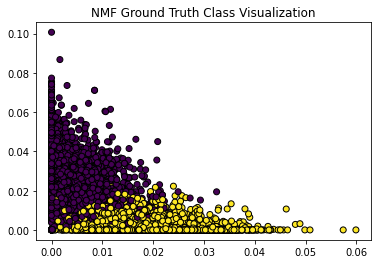

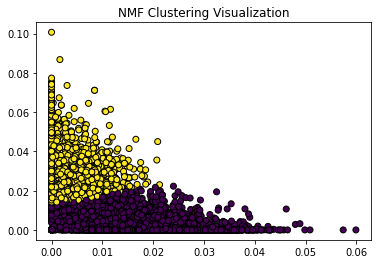

In [ ]:
# nmf r =2 

nmf1_2 = NMF(n_components = 2, init='random', random_state = 0) 
X_dataset_nmf_2 = nmf1_2.fit_transform(X_train_tfidf) 

# Apply K-means clustering with k = 2
km_nmf_2 = KMeans(n_clusters=2, random_state=0,  max_iter=1000, n_init=30) 
km_nmf_2.fit(X_dataset_nmf_2)


# NMF Ground Truth Class Label
plt.scatter(X_dataset_nmf_2[:,0], X_dataset_nmf_2[:,1], c = y, edgecolors = 'k', linewidth = 1.0)
plt.title("NMF Ground Truth Class Visualization")
plt.show()

# NMF Clustering Label
plt.scatter(X_dataset_nmf_2[:,0], X_dataset_nmf_2[:,1], c = km_nmf_2.labels_, edgecolors = 'k', linewidth = 1.0)
plt.title("NMF Clustering Visualization")
plt.show()

#### Q10

In [3]:
!pip install umap-learn
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7af52454065a61de551ef3f52221f557fa2feca15da6ff6fb72cb0c779adf2f5
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=9298d92dc48c429c766add88aa67c8c0ba69dd1a76ec9d619cde6d14c481768d
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [4]:
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan
import umap.umap_ as umap

In [ ]:
# load data
all_data = fetch_20newsgroups(subset = "all", shuffle = True, random_state = 0, 
                                 remove=('headers', 'footers'))

tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
X_alldata_tfidf = tfidf_vector.fit_transform(all_data.data)

20 classes all_data SVD Homogeneity Score: 0.333035330305657
20 classes all_data SVD Completeness Score: 0.3756147353734766
20 classes all_data SVD V-measure Score: 0.35304583607960316
20 classes all_data SVD Adjusted Rand Index: 0.12021994803797648
20 classes all_data SVD Adjusted Mutual Information Score: 0.3508221245940603
20 classes, svd with all data r = 20


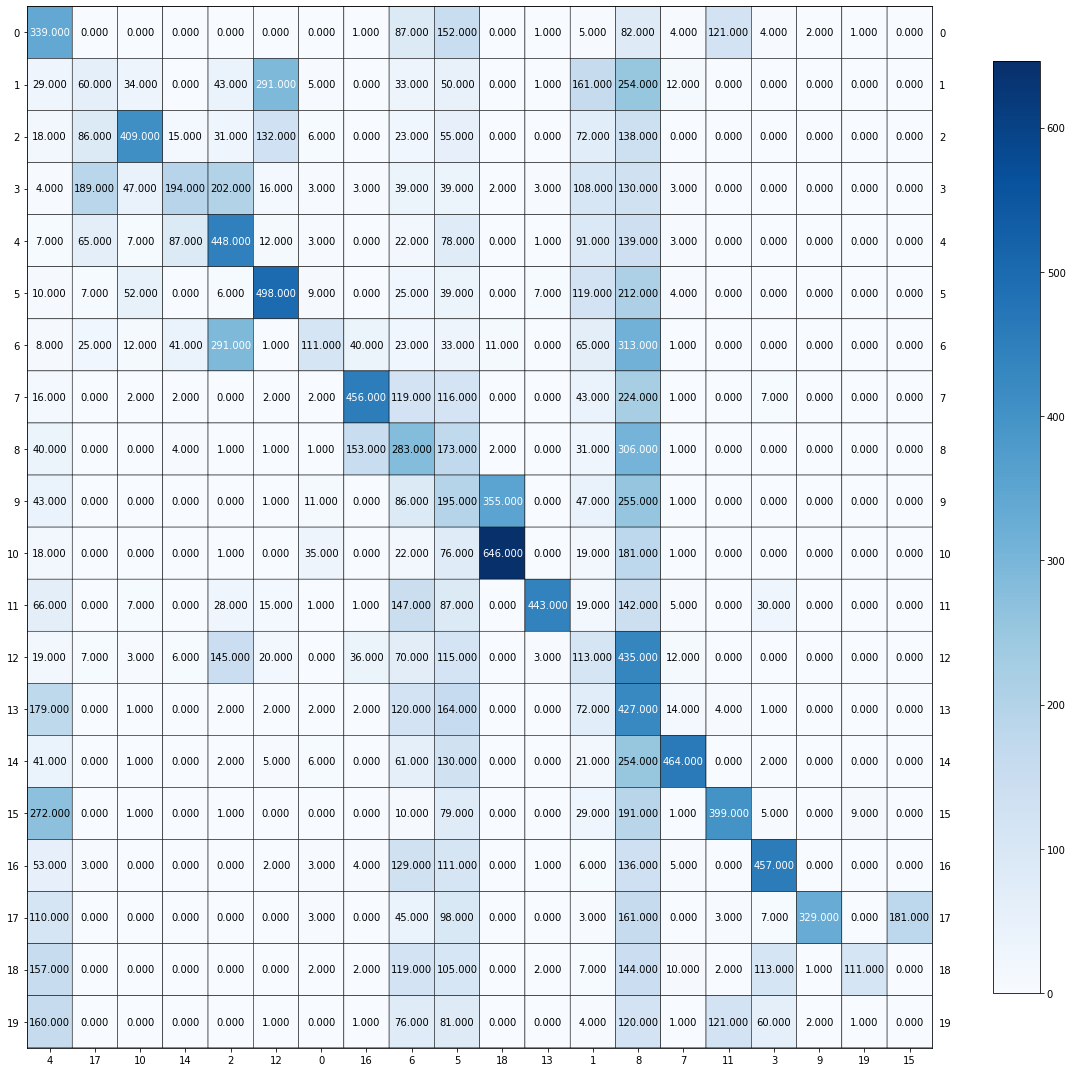

In [ ]:
# apply SVD
SVD_alldata = TruncatedSVD(n_components = 20, random_state = 0)
SVD_alldata_reduced = SVD_alldata.fit_transform(X_alldata_tfidf)

# apply k-means 
km_svd_20_all = KMeans(n_clusters=20, random_state=0,  max_iter=1000, n_init=30)
km_svd_20_all.fit(SVD_alldata_reduced)

# report the 5 measures 
print("20 classes all_data SVD Homogeneity Score:" , homogeneity_score(all_data.target, km_svd_20_all.labels_))
print("20 classes all_data SVD Completeness Score:", completeness_score(all_data.target, km_svd_20_all.labels_))
print("20 classes all_data SVD V-measure Score:", v_measure_score(all_data.target, km_svd_20_all.labels_))
print("20 classes all_data SVD Adjusted Rand Index:", adjusted_rand_score(all_data.target, km_svd_20_all.labels_))
print("20 classes all_data SVD Adjusted Mutual Information Score:", adjusted_mutual_info_score(all_data.target, km_svd_20_all.labels_))

# Plot the contingency matrix using the code provided
cm_alldata_svd = confusion_matrix(all_data.target, km_svd_20_all.labels_)
rows, cols = linear_sum_assignment(cm_alldata_svd, maximize=True)
print("20 classes, svd with all data r = 20")
plot_mat(cm_alldata_svd[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))


#### Q11

20 classes all_data NMF Homogeneity Score: 0.19219640113142314
20 classes all_data NMF Completeness Score: 0.20502118735704652
20 classes all_data NMF V-measure Score: 0.19840176018217479
20 classes all_data NMF Adjusted Rand Index: 0.05819280806933572
20 classes all_data NMF Adjusted Mutual Information Score: 0.19571494709338666
20 classes, nmf with all data r = 20


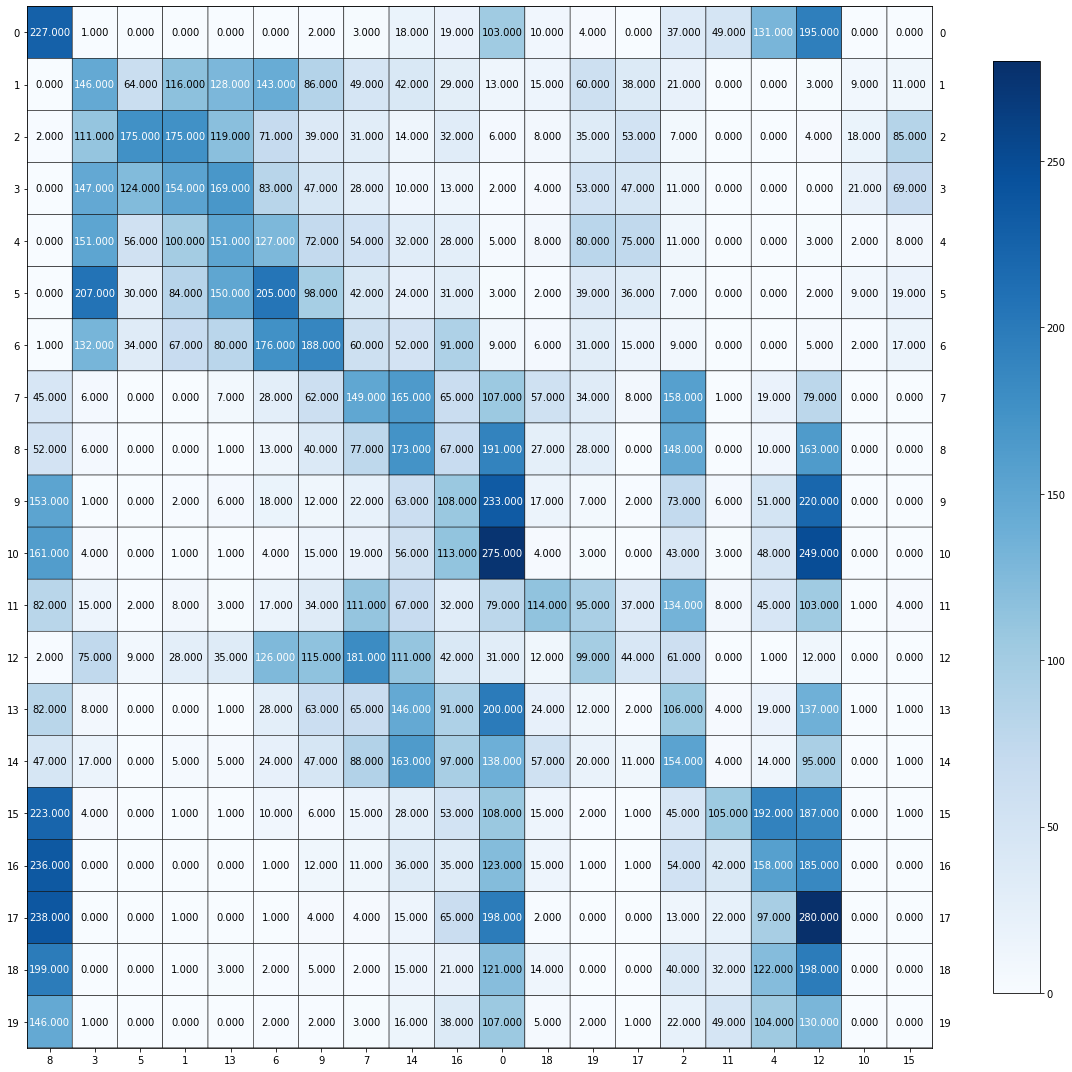

In [ ]:
# apply NMF
NMF_alldata =NMF(n_components=2,init='random',random_state=0)
NMF_alldata_reduced = NMF_alldata.fit_transform(X_alldata_tfidf)

km_nmf_2_all = KMeans(n_clusters=20, random_state=0,  max_iter=1000, n_init=30)
km_nmf_2_all.fit(NMF_alldata_reduced)

# report the 5 measures 
print("20 classes all_data NMF Homogeneity Score:" , homogeneity_score(all_data.target, km_nmf_2_all.labels_))
print("20 classes all_data NMF Completeness Score:", completeness_score(all_data.target, km_nmf_2_all.labels_))
print("20 classes all_data NMF V-measure Score:", v_measure_score(all_data.target, km_nmf_2_all.labels_))
print("20 classes all_data NMF Adjusted Rand Index:", adjusted_rand_score(all_data.target, km_nmf_2_all.labels_))
print("20 classes all_data NMF Adjusted Mutual Information Score:", adjusted_mutual_info_score(all_data.target, km_nmf_2_all.labels_))

# Plot the contingency matrix using the code provided
cm_alldata_nmf = confusion_matrix(all_data.target, km_nmf_2_all.labels_)
rows, cols = linear_sum_assignment(cm_alldata_nmf, maximize=True)
print("20 classes, nmf with all data r = 20")
plot_mat(cm_alldata_nmf[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))


#### Q11

In [ ]:
# load dataset
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
data_tfidf = tfidf_vector.fit_transform(dataset.data)

r = [5,20,200]
H_Eucli = []
C_Eucli = []
V_Eucli = []
AR_Eucli = []
AM_Eucli = []  
H_Cos = []
C_Cos = []
V_Cos = []
AR_Cos = []
AM_Cos = [] 

r =  5
Homogeneity score of Euclidean metric with r = 5  is:  0.008957180373793143
Completeness score of Euclidean metric with r = 5 is:  0.009335583877543198
V-measure score of Euclidean metric with r = 5 is:  0.009142468304616224
Adjusted rand index score of Euclidean metric with r = 5 is:  0.0011709143525601492
Adjusted mutual information score of Euclidean metric with r = 5 is:  0.005882699277536377
Umap Euclidean metric with r = 5


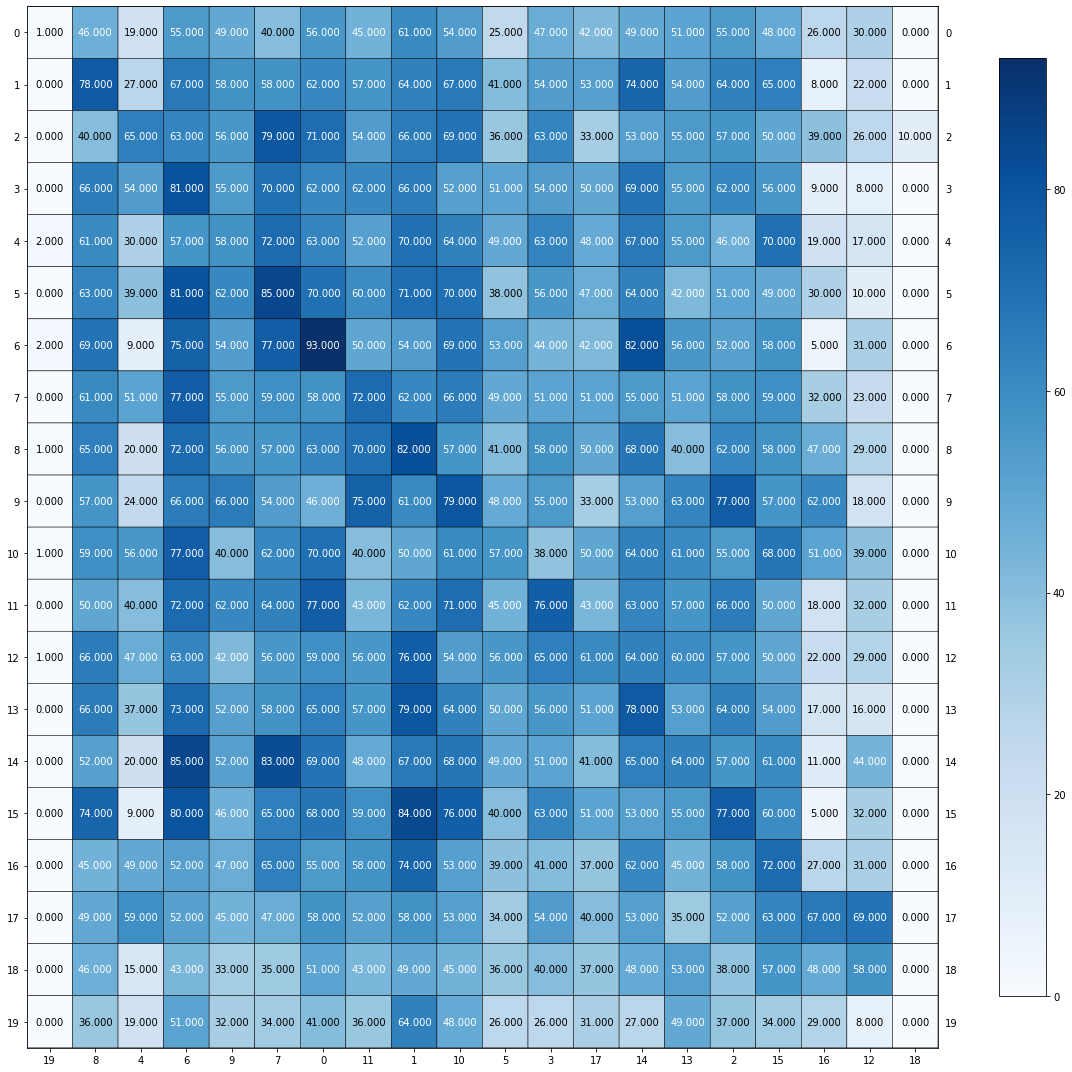

In [ ]:
# r=5 Euclidean metric
r = 5
print('r = ', r)
Umap5 = umap.UMAP(n_components=r, metric='euclidean')
Umap_Eucli = Umap5.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Eucli = K_Means.fit(Umap_Eucli)

# clustering evaluation metrics
H_Eucli.append(homogeneity_score(dataset.target, KM_Eucli.labels_))
C_Eucli.append(completeness_score(dataset.target, KM_Eucli.labels_))
V_Eucli.append(v_measure_score(dataset.target, KM_Eucli.labels_))
AR_Eucli.append(adjusted_rand_score(dataset.target, KM_Eucli.labels_))
AM_Eucli.append(adjusted_mutual_info_score(dataset.target, KM_Eucli.labels_))

print("Homogeneity score of Euclidean metric with r = 5  is: ", H_Eucli[0])
print("Completeness score of Euclidean metric with r = 5 is: ", C_Eucli[0])
print("V-measure score of Euclidean metric with r = 5 is: ", V_Eucli[0])
print("Adjusted rand index score of Euclidean metric with r = 5 is: ", AR_Eucli[0])
print("Adjusted mutual information score of Euclidean metric with r = 5 is: ", AM_Eucli[0])

# Plot the contingency matrix using the code provided
cm_KM_Eucli = confusion_matrix(dataset.target, KM_Eucli.labels_)
rows, cols = linear_sum_assignment(cm_KM_Eucli, maximize=True)
print("Umap Euclidean metric with r = 5")
plot_mat(cm_KM_Eucli[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

r =  20
Homogeneity score of Euclidean metric with r = 20  is:  0.008945801450252592
Completeness score of Euclidean metric with r = 20 is:  0.009284135463382333
V-measure score of Euclidean metric with r = 20 is:  0.009111828843526895
Adjusted rand index score of Euclidean metric with r = 20 is:  0.0011845760353496008
Adjusted mutual information score of Euclidean metric with r = 20 is:  0.005839350807052941
Umap Euclidean metric with r = 20


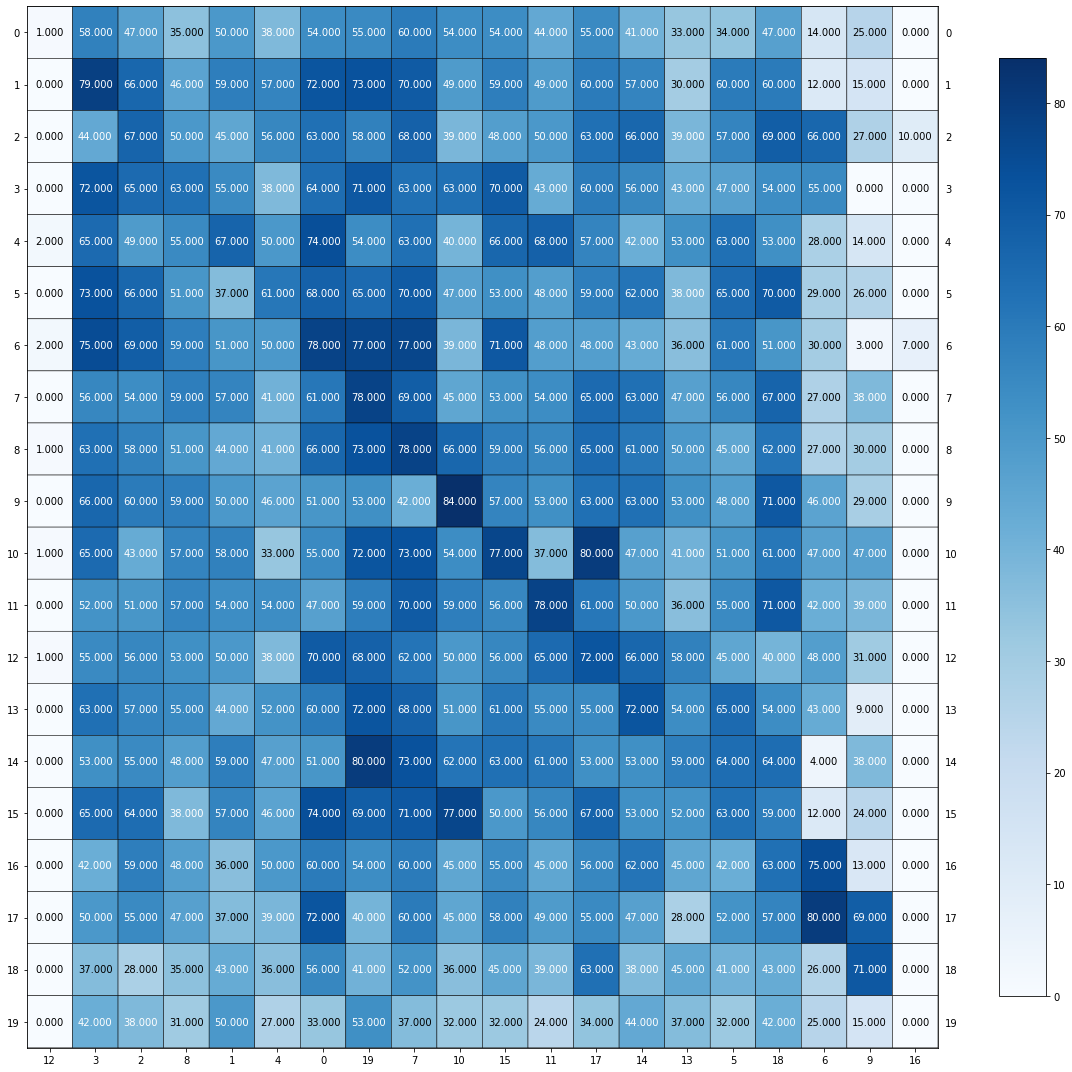

In [ ]:
# r=20 Euclidean metric
r = 20
print('r = ', r)
Umap20 = umap.UMAP(n_components=r, metric='euclidean')
Umap_Eucli = Umap20.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Eucli = K_Means.fit(Umap_Eucli)

# clustering evaluation metrics
H_Eucli.append(homogeneity_score(dataset.target, KM_Eucli.labels_))
C_Eucli.append(completeness_score(dataset.target, KM_Eucli.labels_))
V_Eucli.append(v_measure_score(dataset.target, KM_Eucli.labels_))
AR_Eucli.append(adjusted_rand_score(dataset.target, KM_Eucli.labels_))
AM_Eucli.append(adjusted_mutual_info_score(dataset.target, KM_Eucli.labels_))

print("Homogeneity score of Euclidean metric with r = 20  is: ", H_Eucli[1])
print("Completeness score of Euclidean metric with r = 20 is: ", C_Eucli[1])
print("V-measure score of Euclidean metric with r = 20 is: ", V_Eucli[1])
print("Adjusted rand index score of Euclidean metric with r = 20 is: ", AR_Eucli[1])
print("Adjusted mutual information score of Euclidean metric with r = 20 is: ", AM_Eucli[1])

# Plot the contingency matrix using the code provided
cm_KM_Eucli = confusion_matrix(dataset.target, KM_Eucli.labels_)
rows, cols = linear_sum_assignment(cm_KM_Eucli, maximize=True)
print("Umap Euclidean metric with r = 20")
plot_mat(cm_KM_Eucli[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

r =  200
Homogeneity score of Euclidean metric with r = 200  is:  0.0074978316209419445
Completeness score of Euclidean metric with r = 200 is:  0.007772648942039244
V-measure score of Euclidean metric with r = 200 is:  0.007632767387475779
Adjusted rand index score of Euclidean metric with r = 200 is:  0.0010703190934393259
Adjusted mutual information score of Euclidean metric with r = 200 is:  0.004384756856969533
Umap Euclidean metric with r = 200


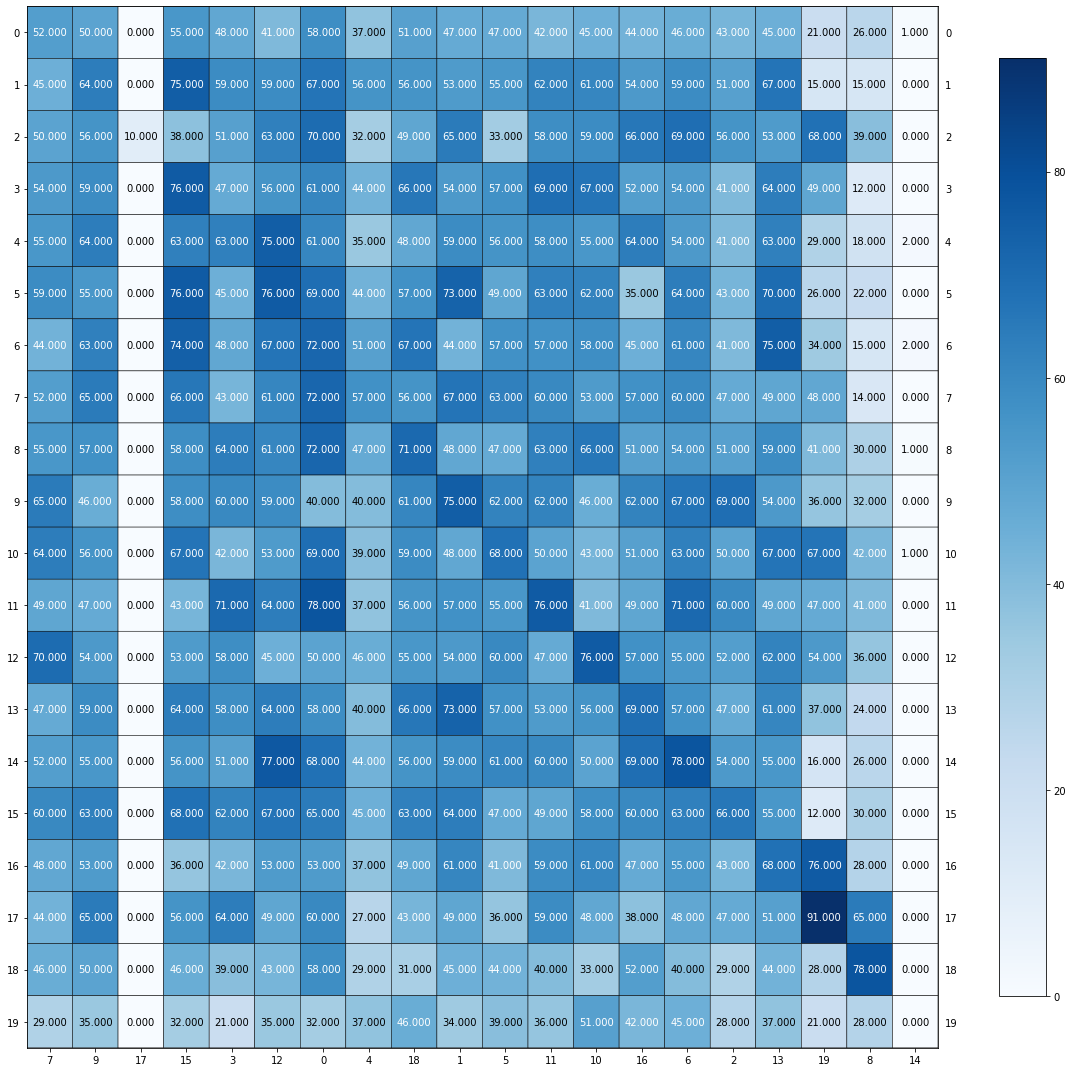

In [ ]:
# r=200 Euclidean metric
r = 200
print('r = ', r)
Umap200 = umap.UMAP(n_components=r, metric='euclidean')
Umap_Eucli = Umap200.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Eucli = K_Means.fit(Umap_Eucli)

# clustering evaluation metrics
H_Eucli.append(homogeneity_score(dataset.target, KM_Eucli.labels_))
C_Eucli.append(completeness_score(dataset.target, KM_Eucli.labels_))
V_Eucli.append(v_measure_score(dataset.target, KM_Eucli.labels_))
AR_Eucli.append(adjusted_rand_score(dataset.target, KM_Eucli.labels_))
AM_Eucli.append(adjusted_mutual_info_score(dataset.target, KM_Eucli.labels_))

print("Homogeneity score of Euclidean metric with r = 200  is: ", H_Eucli[2])
print("Completeness score of Euclidean metric with r = 200 is: ", C_Eucli[2])
print("V-measure score of Euclidean metric with r = 200 is: ", V_Eucli[2])
print("Adjusted rand index score of Euclidean metric with r = 200 is: ", AR_Eucli[2])
print("Adjusted mutual information score of Euclidean metric with r = 200 is: ", AM_Eucli[2])

# Plot the contingency matrix using the code provided
cm_KM_Eucli = confusion_matrix(dataset.target, KM_Eucli.labels_)
rows, cols = linear_sum_assignment(cm_KM_Eucli, maximize=True)
print("Umap Euclidean metric with r = 200")
plot_mat(cm_KM_Eucli[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [ ]:
print("Homogeneity score of Euclidean metric is: ", H_Eucli)
print("Completeness score of Euclidean metric is: ", C_Eucli)
print("V-measure score of Euclidean metric is: ", V_Eucli)
print("Adjusted rand index score of Euclidean metric is: ", AR_Eucli)
print("Adjusted mutual information score of Euclidean metric is: ", AM_Eucli)

Homogeneity score of Euclidean metric is:  [0.008957180373793143, 0.008945801450252592, 0.0074978316209419445]
Completeness score of Euclidean metric is:  [0.009335583877543198, 0.009284135463382333, 0.007772648942039244]
V-measure score of Euclidean metric is:  [0.009142468304616224, 0.009111828843526895, 0.007632767387475779]
Adjusted rand index score of Euclidean metric is:  [0.0011709143525601492, 0.0011845760353496008, 0.0010703190934393259]
Adjusted mutual information score of Euclidean metric is:  [0.005882699277536377, 0.005839350807052941, 0.004384756856969533]


r =  5
Homogeneity score of Cosine metric with r = 5  is:  0.5623670380382431
Completeness score of Cosine metric with r = 5 is:  0.5877322458068488
V-measure score of Cosine metric with r = 5 is:  0.5747699296515351
Adjusted rand index score of Cosine metric with r = 5 is:  0.4390464414154461
Adjusted mutual information score of Cosine metric with r = 5 is:  0.5733572068852046
Umap Cosine metric with r = 5


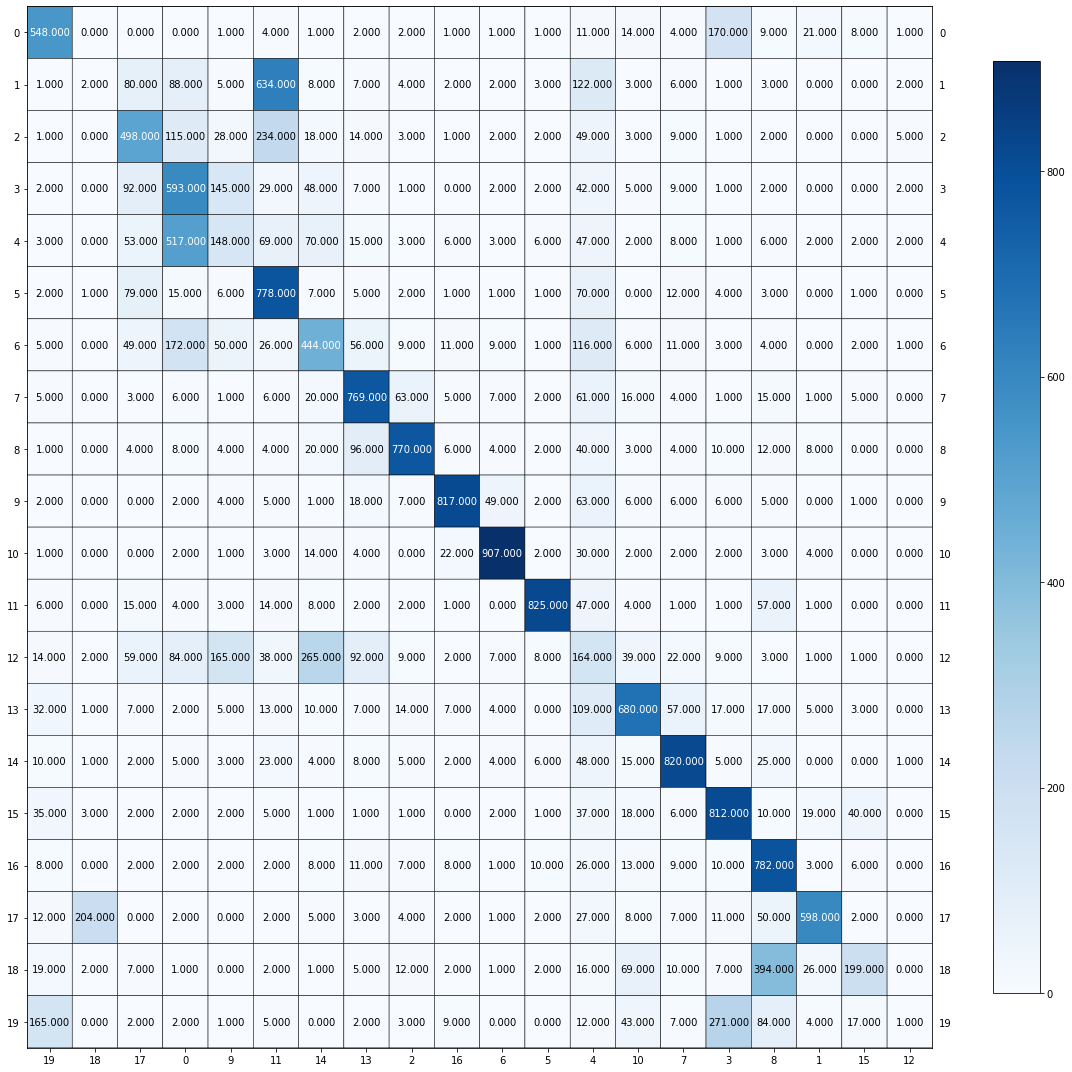

In [ ]:
# r=5 Cosine metric
r = 5
print('r = ', r)
Umap5 = umap.UMAP(n_components=r, metric='cosine')
Umap_Cos = Umap5.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Cos = K_Means.fit(Umap_Cos)

# clustering evaluation metrics
H_Cos.append(homogeneity_score(dataset.target, KM_Cos.labels_))
C_Cos.append(completeness_score(dataset.target, KM_Cos.labels_))
V_Cos.append(v_measure_score(dataset.target, KM_Cos.labels_))
AR_Cos.append(adjusted_rand_score(dataset.target, KM_Cos.labels_))
AM_Cos.append(adjusted_mutual_info_score(dataset.target, KM_Cos.labels_))

print("Homogeneity score of Cosine metric with r = 5  is: ", H_Cos[0])
print("Completeness score of Cosine metric with r = 5 is: ", C_Cos[0])
print("V-measure score of Cosine metric with r = 5 is: ", V_Cos[0])
print("Adjusted rand index score of Cosine metric with r = 5 is: ", AR_Cos[0])
print("Adjusted mutual information score of Cosine metric with r = 5 is: ", AM_Cos[0])

# Plot the contingency matrix using the code provided
cm_KM_Cos = confusion_matrix(dataset.target, KM_Cos.labels_)
rows, cols = linear_sum_assignment(cm_KM_Cos, maximize=True)
print("Umap Cosine metric with r = 5")
plot_mat(cm_KM_Cos[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

r =  20
Homogeneity score of Cosine metric with r = 20  is:  0.5752302844558524
Completeness score of Cosine metric with r = 20 is:  0.589037914355199
V-measure score of Cosine metric with r = 20 is:  0.5820522236643383
Adjusted rand index score of Cosine metric with r = 20 is:  0.4494602350551801
Adjusted mutual information score of Cosine metric with r = 20 is:  0.5806861234318288
Umap Cosine metric with r = 20


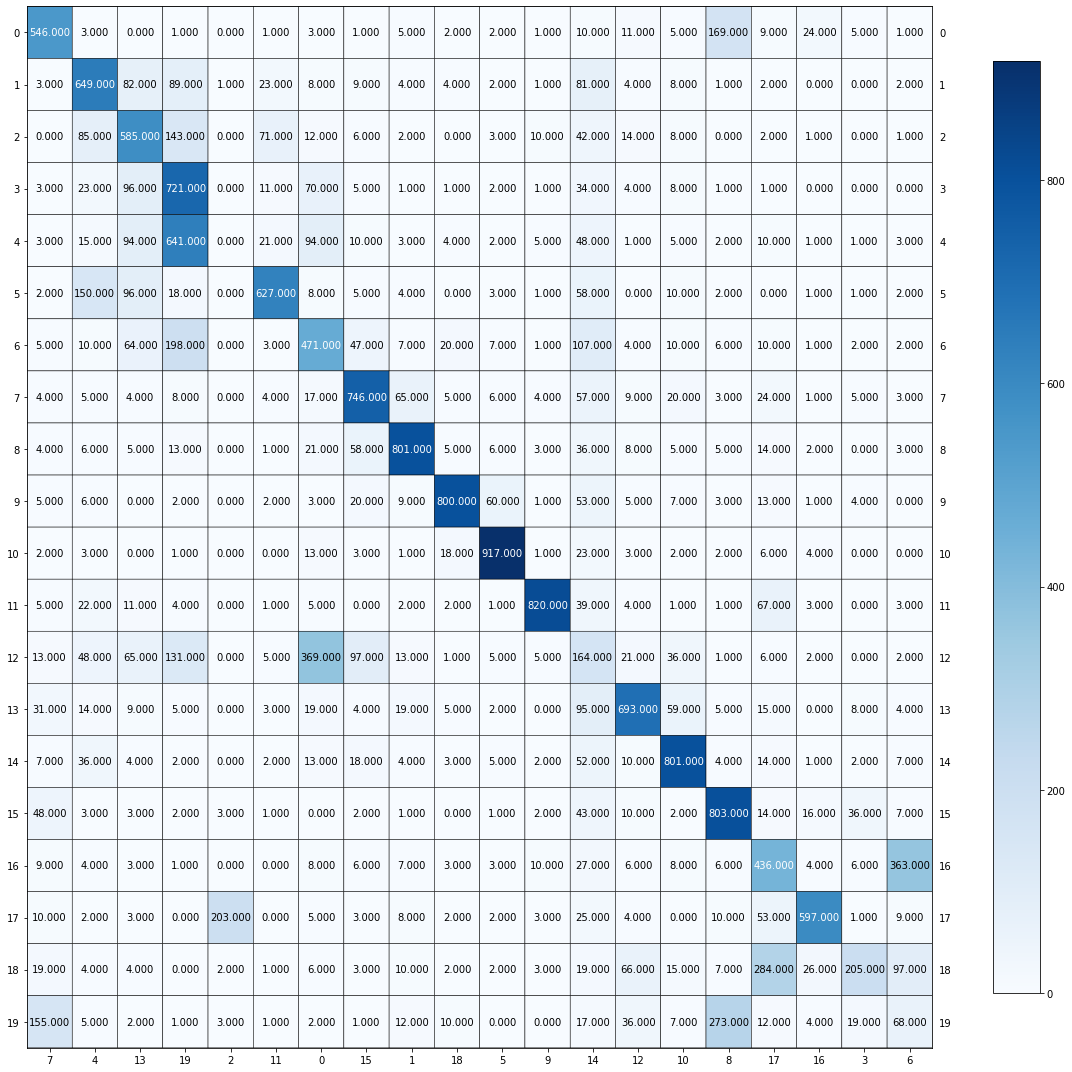

In [ ]:
# r=20 Cosine metric
r = 20
print('r = ', r)
Umap20 = umap.UMAP(n_components=r, metric='cosine')
Umap_Cos = Umap20.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Cos = K_Means.fit(Umap_Cos)

# clustering evaluation metrics
H_Cos.append(homogeneity_score(dataset.target, KM_Cos.labels_))
C_Cos.append(completeness_score(dataset.target, KM_Cos.labels_))
V_Cos.append(v_measure_score(dataset.target, KM_Cos.labels_))
AR_Cos.append(adjusted_rand_score(dataset.target, KM_Cos.labels_))
AM_Cos.append(adjusted_mutual_info_score(dataset.target, KM_Cos.labels_))

print("Homogeneity score of Cosine metric with r = 20  is: ", H_Cos[1])
print("Completeness score of Cosine metric with r = 20 is: ", C_Cos[1])
print("V-measure score of Cosine metric with r = 20 is: ", V_Cos[1])
print("Adjusted rand index score of Cosine metric with r = 20 is: ", AR_Cos[1])
print("Adjusted mutual information score of Cosine metric with r = 20 is: ", AM_Cos[1])

# Plot the contingency matrix using the code provided
cm_KM_Cos = confusion_matrix(dataset.target, KM_Cos.labels_)
rows, cols = linear_sum_assignment(cm_KM_Cos, maximize=True)
print("Umap Cosine metric with r = 20")
plot_mat(cm_KM_Cos[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

r =  200
Homogeneity score of Cosine metric with r = 200  is:  0.5712024725881274
Completeness score of Cosine metric with r = 200 is:  0.6013161743736455
V-measure score of Cosine metric with r = 200 is:  0.5858726195945232
Adjusted rand index score of Cosine metric with r = 200 is:  0.4549932041367347
Adjusted mutual information score of Cosine metric with r = 200 is:  0.5844887957959045
Umap Cosine metric with r = 200


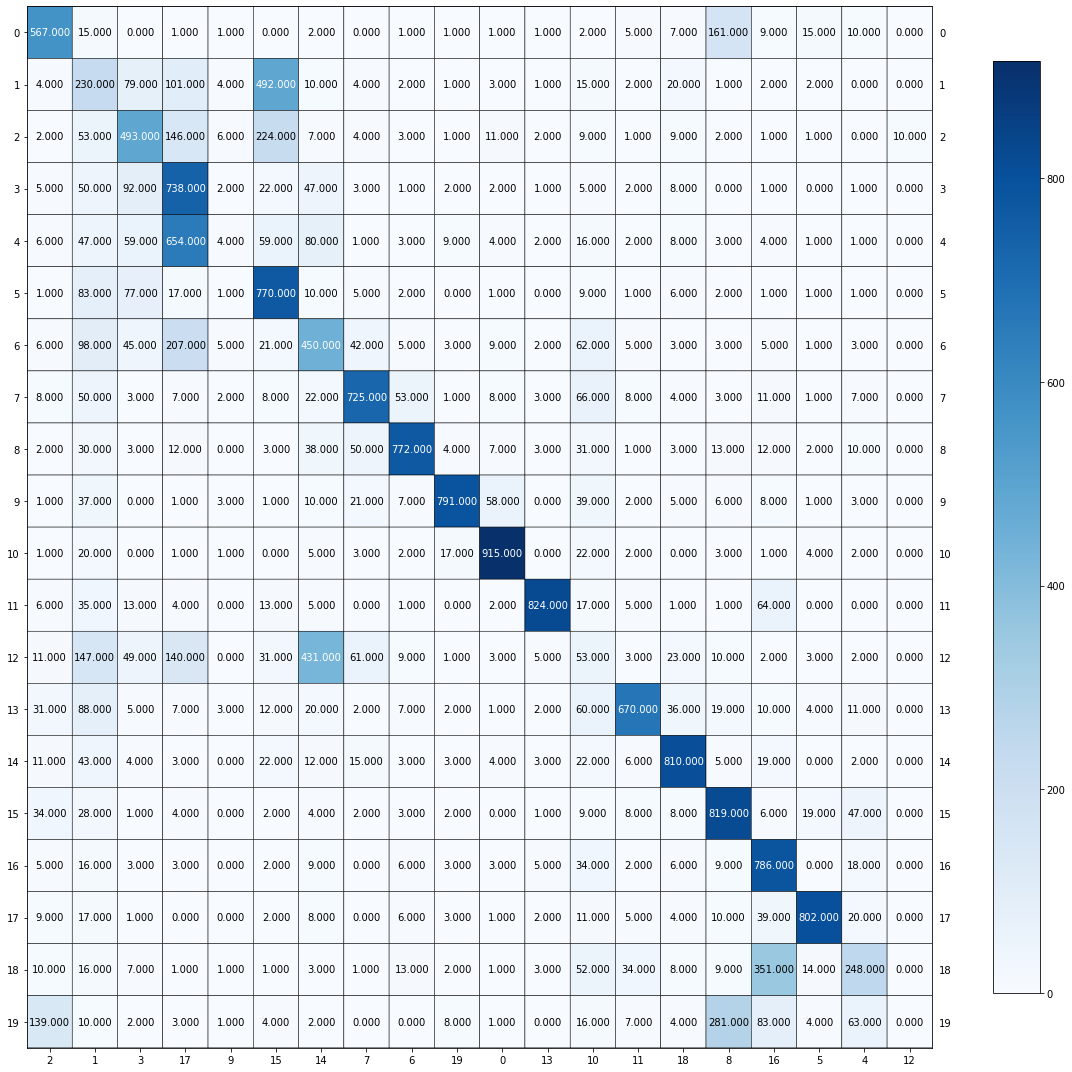

In [ ]:
# r=200 Cosine metric
r = 200
print('r = ', r)
Umap200 = umap.UMAP(n_components=r, metric='cosine')
Umap_Cos = Umap200.fit_transform(data_tfidf)
K_Means = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
KM_Cos = K_Means.fit(Umap_Cos)

# clustering evaluation metrics
H_Cos.append(homogeneity_score(dataset.target, KM_Cos.labels_))
C_Cos.append(completeness_score(dataset.target, KM_Cos.labels_))
V_Cos.append(v_measure_score(dataset.target, KM_Cos.labels_))
AR_Cos.append(adjusted_rand_score(dataset.target, KM_Cos.labels_))
AM_Cos.append(adjusted_mutual_info_score(dataset.target, KM_Cos.labels_))

print("Homogeneity score of Cosine metric with r = 200  is: ", H_Cos[2])
print("Completeness score of Cosine metric with r = 200 is: ", C_Cos[2])
print("V-measure score of Cosine metric with r = 200 is: ", V_Cos[2])
print("Adjusted rand index score of Cosine metric with r = 200 is: ", AR_Cos[2])
print("Adjusted mutual information score of Cosine metric with r = 200 is: ", AM_Cos[2])

# Plot the contingency matrix using the code provided
cm_KM_Cos = confusion_matrix(dataset.target, KM_Cos.labels_)
rows, cols = linear_sum_assignment(cm_KM_Cos, maximize=True)
print("Umap Cosine metric with r = 200")
plot_mat(cm_KM_Cos[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [ ]:
print("Homogeneity score of Cosine metric is: ", H_Cos)
print("Completeness score of Cosine metric is: ", C_Cos)
print("V-measure score of Cosine metric is: ", V_Cos)
print("Adjusted rand index score of Cosine metric is: ", AR_Cos)
print("Adjusted mutual information score of Cosine metric is: ", AM_Cos)

Homogeneity score of Cosine metric is:  [0.5623670380382431, 0.5752302844558524, 0.5712024725881274]
Completeness score of Cosine metric is:  [0.5877322458068488, 0.589037914355199, 0.6013161743736455]
V-measure score of Cosine metric is:  [0.5747699296515351, 0.5820522236643383, 0.5858726195945232]
Adjusted rand index score of Cosine metric is:  [0.4390464414154461, 0.4494602350551801, 0.4549932041367347]
Adjusted mutual information score of Cosine metric is:  [0.5733572068852046, 0.5806861234318288, 0.5844887957959045]


#### Q14

In [ ]:
agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(Umap_Cos)
print("Homogeneity score of Agglomerative Clustering, Ward is: ", homogeneity_score(dataset.target, agg_ward.labels_))
print("Completeness score of Agglomerative Clustering, Ward is: ", completeness_score(dataset.target, agg_ward.labels_))
print("V-measure score of Agglomerative Clustering, Ward is: ", v_measure_score(dataset.target, agg_ward.labels_))
print("Adjusted rand index score of Agglomerative Clustering, Ward is: ", adjusted_rand_score(dataset.target, agg_ward.labels_))
print("Adjusted mutual information score of Agglomerative Clustering, Ward is: ", adjusted_mutual_info_score(dataset.target, agg_ward.labels_))

agg_single = AgglomerativeClustering(n_clusters=20, linkage='single').fit(Umap_Cos)
print("-"*50)
print("Homogeneity score of Agglomerative Clustering, single is: ", homogeneity_score(dataset.target, agg_single.labels_))
print("Completeness score of Agglomerative Clustering, single is: ", completeness_score(dataset.target, agg_single.labels_))
print("V-measure score of Agglomerative Clustering, single is: ", v_measure_score(dataset.target, agg_single.labels_))
print("Adjusted rand index score of Agglomerative Clustering, single is: ", adjusted_rand_score(dataset.target, agg_single.labels_))
print("Adjusted mutual information score of Agglomerative Clustering, single is: ", adjusted_mutual_info_score(dataset.target, agg_single.labels_))

Homogeneity score of Agglomerative Clustering, Ward is:  0.5648008904506769
Completeness score of Agglomerative Clustering, Ward is:  0.5734857504253817
V-measure score of Agglomerative Clustering, Ward is:  0.5691101887161626
Adjusted rand index score of Agglomerative Clustering, Ward is:  0.4380650829383412
Adjusted mutual information score of Agglomerative Clustering, Ward is:  0.5677081559317146
--------------------------------------------------
Homogeneity score of Agglomerative Clustering, single is:  0.01688636625345775
Completeness score of Agglomerative Clustering, single is:  0.3993264937938413
V-measure score of Agglomerative Clustering, single is:  0.03240252320961742
Adjusted rand index score of Agglomerative Clustering, single is:  0.0004482808058432336
Adjusted mutual information score of Agglomerative Clustering, single is:  0.027464005973824437


#### Q15

In [ ]:
min_samples = [20,100,200]
H_HDBSCAN = []
C_HDBSCAN = []
V_HDBSCAN = []
AR_HDBSCAN = []
AM_HDBSCAN = [] 

#### DBSCAN

In [ ]:
H_DBSCAN = []
C_DBSCAN = []
V_DBSCAN = []
AR_DBSCAN = []
AM_DBSCAN = [] 
# min_sample = 20
DB20 = DBSCAN(min_samples=20, n_jobs=-1).fit_predict(Umap_Cos)
H_DBSCAN.append(homogeneity_score(dataset.target, DB20))
C_DBSCAN.append(completeness_score(dataset.target, DB20))
V_DBSCAN.append(v_measure_score(dataset.target, DB20))
AR_DBSCAN.append(adjusted_rand_score(dataset.target, DB20))
AM_DBSCAN.append(adjusted_mutual_info_score(dataset.target, DB20))

print("Homogeneity score of DBSCAN with min_cluster_size = 20 is: ", H_DBSCAN[0])
print("Completeness score of DBSCAN with min_cluster_size = 20 is: ", C_DBSCAN[0])
print("V-measure score of DBSCAN with min_cluster_size = 20 is: ", V_DBSCAN[0])
print("Adjusted rand index score of DBSCAN with min_cluster_size = 20 is: ", AR_DBSCAN[0])
print("Adjusted mutual information score of DBSCAN with min_cluster_size = 20 is: ", AM_DBSCAN[0])

Homogeneity score of DBSCAN with min_cluster_size = 20 is:  0.3624561904903837
Completeness score of DBSCAN with min_cluster_size = 20 is:  0.6203567428855574
V-measure score of DBSCAN with min_cluster_size = 20 is:  0.4575685446038227
Adjusted rand index score of DBSCAN with min_cluster_size = 20 is:  0.16680163872003786
Adjusted mutual information score of DBSCAN with min_cluster_size = 20 is:  0.45502618567692604


In [ ]:
# min_sample = 100
DB100 = DBSCAN(min_samples=100, n_jobs=-1).fit_predict(Umap_Cos)
H_DBSCAN.append(homogeneity_score(dataset.target, DB100))
C_DBSCAN.append(completeness_score(dataset.target, DB100))
V_DBSCAN.append(v_measure_score(dataset.target, DB100))
AR_DBSCAN.append(adjusted_rand_score(dataset.target, DB100))
AM_DBSCAN.append(adjusted_mutual_info_score(dataset.target, DB100))

print("Homogeneity score of DBSCAN with min_cluster_size = 100 is: ", H_DBSCAN[1])
print("Completeness score of DBSCAN with min_cluster_size = 100 is: ", C_DBSCAN[1])
print("V-measure score of DBSCAN with min_cluster_size = 100 is: ", V_DBSCAN[1])
print("Adjusted rand index score of DBSCAN with min_cluster_size = 100 is: ", AR_DBSCAN[1])
print("Adjusted mutual information score of DBSCAN with min_cluster_size = 100 is: ", AM_DBSCAN[1])

Homogeneity score of DBSCAN with min_cluster_size = 100 is:  0.47063140657731733
Completeness score of DBSCAN with min_cluster_size = 100 is:  0.5754646566725002
V-measure score of DBSCAN with min_cluster_size = 100 is:  0.5177951630253572
Adjusted rand index score of DBSCAN with min_cluster_size = 100 is:  0.27546339623315635
Adjusted mutual information score of DBSCAN with min_cluster_size = 100 is:  0.5164392630257935


In [ ]:
# min_sample = 200
DB200 = DBSCAN(min_samples=200, n_jobs=-1).fit_predict(Umap_Cos)
H_DBSCAN.append(homogeneity_score(dataset.target, DB200))
C_DBSCAN.append(completeness_score(dataset.target, DB200))
V_DBSCAN.append(v_measure_score(dataset.target, DB200))
AR_DBSCAN.append(adjusted_rand_score(dataset.target, DB200))
AM_DBSCAN.append(adjusted_mutual_info_score(dataset.target, DB200))

print("Homogeneity score of DBSCAN with min_cluster_size = 200 is: ", H_DBSCAN[2])
print("Completeness score of DBSCAN with min_cluster_size = 200 is: ", C_DBSCAN[2])
print("V-measure score of DBSCAN with min_cluster_size = 200 is: ", V_DBSCAN[2])
print("Adjusted rand index score of DBSCAN with min_cluster_size = 200 is: ", AR_DBSCAN[2])
print("Adjusted mutual information score of DBSCAN with min_cluster_size = 200 is: ", AM_DBSCAN[2])

Homogeneity score of DBSCAN with min_cluster_size = 200 is:  0.43342702837511965
Completeness score of DBSCAN with min_cluster_size = 200 is:  0.5603846258847129
V-measure score of DBSCAN with min_cluster_size = 200 is:  0.4887965282017344
Adjusted rand index score of DBSCAN with min_cluster_size = 200 is:  0.11530652042684487
Adjusted mutual information score of DBSCAN with min_cluster_size = 200 is:  0.48672738830946805


In [ ]:
print("Homogeneity score of DBSCAN is: ", H_DBSCAN)
print("Completeness score of DBSCAN is: ", C_DBSCAN)
print("V-measure score of DBSCAN is: ", V_DBSCAN)
print("Adjusted rand index score of DBSCAN is: ", AR_DBSCAN)
print("Adjusted mutual information score of DBSCAN is: ", AM_DBSCAN)

Homogeneity score of DBSCAN is:  [0.3624561904903837, 0.47063140657731733, 0.43342702837511965]
Completeness score of DBSCAN is:  [0.6203567428855574, 0.5754646566725002, 0.5603846258847129]
V-measure score of DBSCAN is:  [0.4575685446038227, 0.5177951630253572, 0.4887965282017344]
Adjusted rand index score of DBSCAN is:  [0.16680163872003786, 0.27546339623315635, 0.11530652042684487]
Adjusted mutual information score of DBSCAN is:  [0.45502618567692604, 0.5164392630257935, 0.48672738830946805]


#### HDBSCAN

In [ ]:
# min_sample = 20
HD20 = hdbscan.HDBSCAN(min_cluster_size=20,cluster_selection_epsilon=0.5).fit_predict(Umap_Cos)
H_HDBSCAN.append(homogeneity_score(dataset.target, HD20))
C_HDBSCAN.append(completeness_score(dataset.target, HD20))
V_HDBSCAN.append(v_measure_score(dataset.target, HD20))
AR_HDBSCAN.append(adjusted_rand_score(dataset.target, HD20))
AM_HDBSCAN.append(adjusted_mutual_info_score(dataset.target, HD20))

print("Homogeneity score of HDBSCAN with min_cluster_size = 20 is: ", H_HDBSCAN[0])
print("Completeness score of HDBSCAN with min_cluster_size = 20 is: ", C_HDBSCAN[0])
print("V-measure score of HDBSCAN with min_cluster_size = 20 is: ", V_HDBSCAN[0])
print("Adjusted rand index score of HDBSCAN with min_cluster_size = 20 is: ", AR_HDBSCAN[0])
print("Adjusted mutual information score of HDBSCAN with min_cluster_size = 20 is: ", AM_HDBSCAN[0])


Homogeneity score of HDBSCAN with min_cluster_size = 20 is:  0.3623150646779268
Completeness score of HDBSCAN with min_cluster_size = 20 is:  0.5957406585304943
V-measure score of HDBSCAN with min_cluster_size = 20 is:  0.45059135914120596
Adjusted rand index score of HDBSCAN with min_cluster_size = 20 is:  0.17458812344729008
Adjusted mutual information score of HDBSCAN with min_cluster_size = 20 is:  0.44832366827536596


In [ ]:
# min_sample = 100
HD100 = hdbscan.HDBSCAN(min_cluster_size=100,cluster_selection_epsilon=0.5).fit_predict(Umap_Cos)
H_HDBSCAN.append(homogeneity_score(dataset.target, HD100))
C_HDBSCAN.append(completeness_score(dataset.target, HD100))
V_HDBSCAN.append(v_measure_score(dataset.target, HD100))
AR_HDBSCAN.append(adjusted_rand_score(dataset.target, HD100))
AM_HDBSCAN.append(adjusted_mutual_info_score(dataset.target, HD100))

print("Homogeneity score of HDBSCAN with min_cluster_size = 100 is: ", H_HDBSCAN[1])
print("Completeness score of HDBSCAN with min_cluster_size = 100 is: ", C_HDBSCAN[1])
print("V-measure score of HDBSCAN with min_cluster_size = 100 is: ", V_HDBSCAN[1])
print("Adjusted rand index score of HDBSCAN with min_cluster_size = 100 is: ", AR_HDBSCAN[1])
print("Adjusted mutual information score of HDBSCAN with min_cluster_size = 100 is: ", AM_HDBSCAN[1])

Homogeneity score of HDBSCAN with min_cluster_size = 100 is:  0.397311309480659
Completeness score of HDBSCAN with min_cluster_size = 100 is:  0.6032188910378972
V-measure score of HDBSCAN with min_cluster_size = 100 is:  0.47907736793456834
Adjusted rand index score of HDBSCAN with min_cluster_size = 100 is:  0.20593980991235478
Adjusted mutual information score of HDBSCAN with min_cluster_size = 100 is:  0.4781179621367342


In [ ]:
# min_sample = 200
HD200 = hdbscan.HDBSCAN(min_cluster_size=200,cluster_selection_epsilon=0.5).fit_predict(Umap_Cos)
H_HDBSCAN.append(homogeneity_score(dataset.target, HD200))
C_HDBSCAN.append(completeness_score(dataset.target, HD200))
V_HDBSCAN.append(v_measure_score(dataset.target, HD200))
AR_HDBSCAN.append(adjusted_rand_score(dataset.target, HD200))
AM_HDBSCAN.append(adjusted_mutual_info_score(dataset.target, HD200))

print("Homogeneity score of HDBSCAN with min_cluster_size = 200 is: ", H_HDBSCAN[2])
print("Completeness score of HDBSCAN with min_cluster_size = 200 is: ", C_HDBSCAN[2])
print("V-measure score of HDBSCAN with min_cluster_size = 200 is: ", V_HDBSCAN[2])
print("Adjusted rand index score of HDBSCAN with min_cluster_size = 200 is: ", AR_HDBSCAN[2])
print("Adjusted mutual information score of HDBSCAN with min_cluster_size = 200 is: ", AM_HDBSCAN[2])

Homogeneity score of HDBSCAN with min_cluster_size = 200 is:  0.40868304806975075
Completeness score of HDBSCAN with min_cluster_size = 200 is:  0.603962214404825
V-measure score of HDBSCAN with min_cluster_size = 200 is:  0.48749375096813286
Adjusted rand index score of HDBSCAN with min_cluster_size = 200 is:  0.2032944251463693
Adjusted mutual information score of HDBSCAN with min_cluster_size = 200 is:  0.48645569102358754


In [ ]:
print("Homogeneity score of HDBSCAN with is: ", H_HDBSCAN)
print("Completeness score of HDBSCAN with is: ", C_HDBSCAN)
print("V-measure score of HDBSCAN with is: ", V_HDBSCAN)
print("Adjusted rand index score of HDBSCAN with is: ", AR_HDBSCAN)
print("Adjusted mutual information score of HDBSCAN with is: ", AM_HDBSCAN)

Homogeneity score of HDBSCAN with is:  [0.3623150646779268, 0.397311309480659, 0.40868304806975075]
Completeness score of HDBSCAN with is:  [0.5957406585304943, 0.6032188910378972, 0.603962214404825]
V-measure score of HDBSCAN with is:  [0.45059135914120596, 0.47907736793456834, 0.48749375096813286]
Adjusted rand index score of HDBSCAN with is:  [0.17458812344729008, 0.20593980991235478, 0.2032944251463693]
Adjusted mutual information score of HDBSCAN with is:  [0.44832366827536596, 0.4781179621367342, 0.48645569102358754]


#### Q16

In [ ]:
def best_index(a,b,c,d,e):
  avg_score = []
  for i in range(3):
    sum = a[i]+b[i]+c[i]+d[i]+e[i]
    sum = sum/5
    avg_score.append(sum)

  index = avg_score.index(max(avg_score))
  return index

In [ ]:
# DBSCAN
min_samples = [20,100,200]
index_DB = best_index(H_DBSCAN,C_DBSCAN,V_DBSCAN,AR_DBSCAN,AM_DBSCAN)
print("best score woth r = ", min_samples[index_DB] )
print("Homogeneity score of DBSCAN with best score is: ", H_DBSCAN[index_DB])
print("Completeness score of DBSCAN with best score is: ", C_DBSCAN[index_DB])
print("V-measure score of DBSCAN with best score is: ", V_DBSCAN[index_DB])
print("Adjusted rand index score of DBSCAN with best score is: ", AR_DBSCAN[index_DB])
print("Adjusted mutual information score of DBSCAN with best score is: ", AM_DBSCAN[index_DB])

best score woth r =  100
Homogeneity score of DBSCAN with best score is:  0.47063140657731733
Completeness score of DBSCAN with best score is:  0.5754646566725002
V-measure score of DBSCAN with best score is:  0.5177951630253572
Adjusted rand index score of DBSCAN with best score is:  0.27546339623315635
Adjusted mutual information score of DBSCAN with best score is:  0.5164392630257935


DBSCAN with r = 100


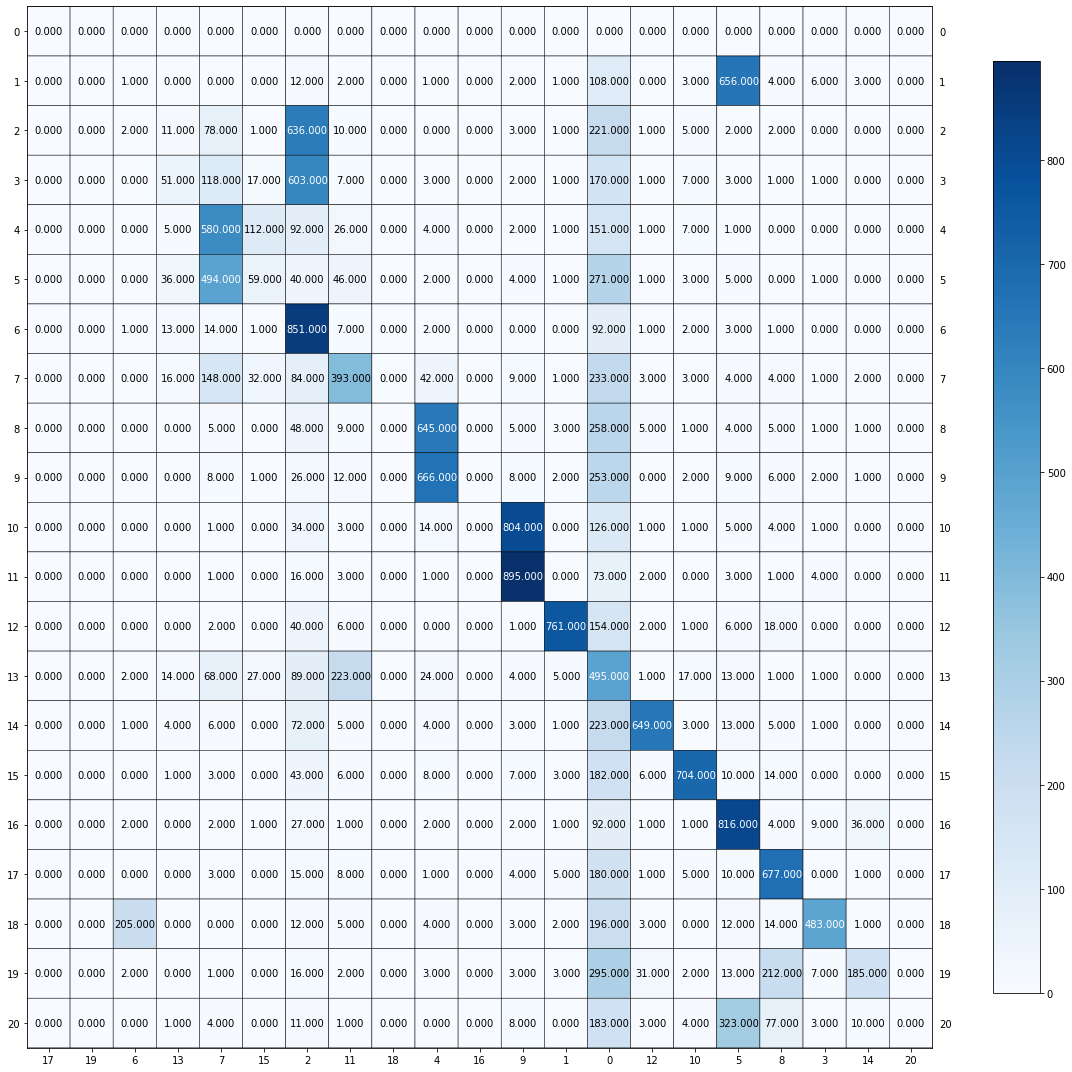

In [ ]:
# Plot the contingency matrix using the code provided
DB = DBSCAN(0.5,min_samples=min_samples[index_DB] ,n_jobs=-1).fit_predict(Umap_Cos)
cm_DB = confusion_matrix(dataset.target, DB)
rows, cols = linear_sum_assignment(cm_DB, maximize=True)
print("DBSCAN with r = 100")
plot_mat(cm_DB[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [ ]:
# HDBSCAN
min_samples = [20,100,200]
index_HDB = best_index(H_HDBSCAN,C_HDBSCAN,V_HDBSCAN,AR_HDBSCAN,AM_HDBSCAN)
print("best score woth r = ", min_samples[index_HDB] )
print("Homogeneity score of HDBSCAN with best score is: ", H_HDBSCAN[index_HDB])
print("Completeness score of HDBSCAN with best score is: ", C_HDBSCAN[index_HDB])
print("V-measure score of HDBSCAN with best score is: ", V_HDBSCAN[index_HDB])
print("Adjusted rand index score of HDBSCAN with best score is: ", AR_HDBSCAN[index_HDB])
print("Adjusted mutual information score of HDBSCAN with best score is: ", AM_HDBSCAN[index_HDB])

best score woth r =  200
Homogeneity score of HDBSCAN with best score is:  0.40868304806975075
Completeness score of HDBSCAN with best score is:  0.603962214404825
V-measure score of HDBSCAN with best score is:  0.48749375096813286
Adjusted rand index score of HDBSCAN with best score is:  0.2032944251463693
Adjusted mutual information score of HDBSCAN with best score is:  0.48645569102358754


HDBSCAN with r = 200


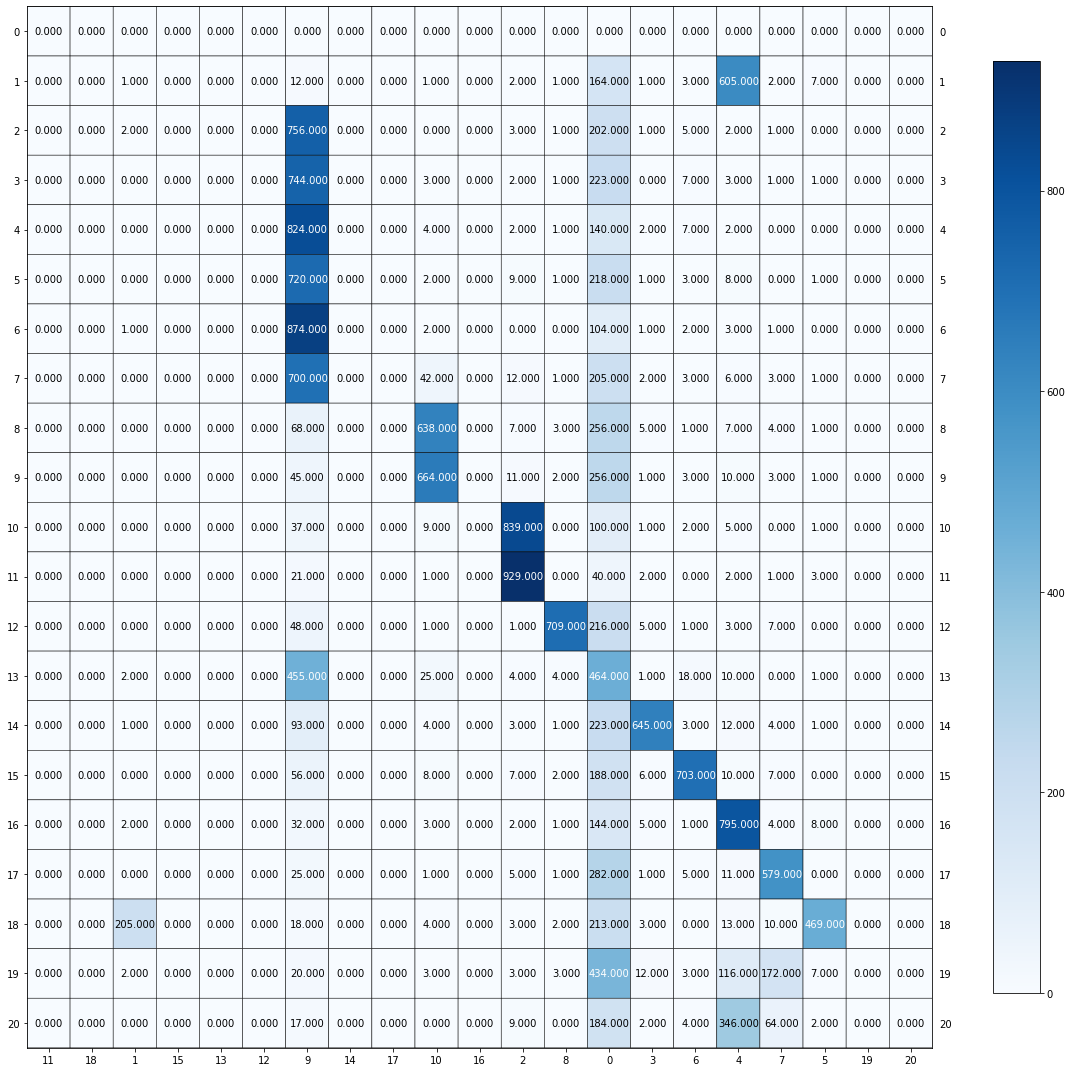

In [ ]:
# Plot the contingency matrix using the code provided
HDB = hdbscan.HDBSCAN(min_cluster_size=min_samples[index_HDB],cluster_selection_epsilon=0.5).fit_predict(Umap_Cos)
cm_HDB = confusion_matrix(dataset.target, HDB)
rows, cols = linear_sum_assignment(cm_HDB, maximize=True)
print("HDBSCAN with r = 200")
plot_mat(cm_HDB[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

#### Q17

##### svd vs Km

In [7]:
# load data
dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
data_tfidf = tfidf_vector.fit_transform(dataset.data)

In [30]:
def svd_km(svd_param, km_param):
  SVD = TruncatedSVD(n_components = svd_param, random_state = 0).fit_transform(data_tfidf)

  # apply k-means 
  km_svd = KMeans(n_clusters=km_param, random_state=0,  max_iter=1000, n_init=30).fit(SVD)

  # report the 5 measures 
  print(f" SVD {svd_param} & K_means {km_param} Homogeneity Score:" , homogeneity_score(dataset.target, km_svd.labels_))
  print(f" SVD {svd_param} & K_means {km_param} Completeness Score:", completeness_score(dataset.target, km_svd.labels_))
  print(f" SVD {svd_param} & K_means {km_param} V-measure Score:", v_measure_score(dataset.target, km_svd.labels_))
  print(f" SVD {svd_param} & K_means {km_param} Adjusted Rand Index:", adjusted_rand_score(dataset.target, km_svd.labels_))
  print(f" SVD {svd_param} & K_means {km_param} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, km_svd.labels_))
    

In [31]:
svd_param = [5,20,200]
km_param = [10,20,50]
for i in svd_param:
  for j in km_param:
    svd_km(i, j)

 SVD 5 & K_means 10 Homogeneity Score: 0.26866802695694336
 SVD 5 & K_means 10 Completeness Score: 0.416550918056886
 SVD 5 & K_means 10 V-measure Score: 0.3266515442861501
 SVD 5 & K_means 10 Adjusted Rand Index: 0.10403424138464548
 SVD 5 & K_means 10 Adjusted Mutual Information Score: 0.32540134660608033
 SVD 5 & K_means 20 Homogeneity Score: 0.3201627171469848
 SVD 5 & K_means 20 Completeness Score: 0.34828903054171256
 SVD 5 & K_means 20 V-measure Score: 0.3336341411516646
 SVD 5 & K_means 20 Adjusted Rand Index: 0.1259875510824014
 SVD 5 & K_means 20 Adjusted Mutual Information Score: 0.3313841475757759
 SVD 5 & K_means 50 Homogeneity Score: 0.36707392400234906
 SVD 5 & K_means 50 Completeness Score: 0.2970034084409075
 SVD 5 & K_means 50 V-measure Score: 0.3283419001138454
 SVD 5 & K_means 50 Adjusted Rand Index: 0.09845317204936135
 SVD 5 & K_means 50 Adjusted Mutual Information Score: 0.32322268185221326
 SVD 20 & K_means 10 Homogeneity Score: 0.2615201753309794
 SVD 20 & K_me

#### svd vs AgC

In [32]:
def svd_AgC(svd_param, n_cluster):
  SVD = TruncatedSVD(n_components = svd_param, random_state = 0).fit_transform(data_tfidf)

  # apply Agglomerative Clustering
  AgC_svd = AgglomerativeClustering(n_clusters=n_cluster).fit(SVD)

  # report the 5 measures 
  print(f" SVD {svd_param} & A Clustering {n_cluster} Homogeneity Score:" , homogeneity_score(dataset.target, AgC_svd.labels_))
  print(f" SVD {svd_param} & A Clustering {n_cluster} Completeness Score:", completeness_score(dataset.target, AgC_svd.labels_))
  print(f" SVD {svd_param} & A Clustering {n_cluster} V-measure Score:", v_measure_score(dataset.target, AgC_svd.labels_))
  print(f" SVD {svd_param} & A Clustering {n_cluster} Adjusted Rand Index:", adjusted_rand_score(dataset.target, AgC_svd.labels_))
  print(f" SVD {svd_param} & A Clustering {n_cluster} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, AgC_svd.labels_))
  print("-"*30)


In [33]:
svd_param = [5,20,200]
n_cluster = 20
for i in svd_param:
    svd_AgC(i, n_cluster)

 SVD 5 & A Clustering 20 Homogeneity Score: 0.3115453157948802
 SVD 5 & A Clustering 20 Completeness Score: 0.3373109675268556
 SVD 5 & A Clustering 20 V-measure Score: 0.32391657320862544
 SVD 5 & A Clustering 20 Adjusted Rand Index: 0.11437723398830446
 SVD 5 & A Clustering 20 Adjusted Mutual Information Score: 0.32164117146263144
------------------------------
 SVD 20 & A Clustering 20 Homogeneity Score: 0.38186534396866356
 SVD 20 & A Clustering 20 Completeness Score: 0.4064017991451109
 SVD 20 & A Clustering 20 V-measure Score: 0.3937516974435964
 SVD 20 & A Clustering 20 Adjusted Rand Index: 0.20030091106433323
 SVD 20 & A Clustering 20 Adjusted Mutual Information Score: 0.39172477193118244
------------------------------
 SVD 200 & A Clustering 20 Homogeneity Score: 0.3301424557357157
 SVD 200 & A Clustering 20 Completeness Score: 0.44110007006381774
 SVD 200 & A Clustering 20 V-measure Score: 0.37763960229007676
 SVD 200 & A Clustering 20 Adjusted Rand Index: 0.11368851618049415

#### svd vs HD

In [34]:
def svd_HD(svd_param, HD_cluster):
  SVD = TruncatedSVD(n_components = svd_param, random_state = 0).fit_transform(data_tfidf)

  # apply HDBSCAN 
  HD_svd = hdbscan.HDBSCAN(min_cluster_size=HD_cluster,cluster_selection_epsilon=0.5).fit_predict(SVD)

  # report the 5 measures 
  print(f" SVD {svd_param} & HDBSCAN {HD_cluster} Homogeneity Score:" , homogeneity_score(dataset.target, HD_svd))
  print(f" SVD {svd_param} & HDBSCAN {HD_cluster} Completeness Score:", completeness_score(dataset.target, HD_svd))
  print(f" SVD {svd_param} & HDBSCAN {HD_cluster} V-measure Score:", v_measure_score(dataset.target, HD_svd))
  print(f" SVD {svd_param} & HDBSCAN {HD_cluster} Adjusted Rand Index:", adjusted_rand_score(dataset.target, HD_svd))
  print(f" SVD {svd_param} & HDBSCAN {HD_cluster} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, HD_svd))
  print("-"*100)

In [35]:
svd_param = [5,20,200]
HD_cluster = [100,200]
for i in svd_param:
  for j in HD_cluster:
    svd_HD(i, j)

 SVD 5 & HDBSCAN 100 Homogeneity Score: 0.0
 SVD 5 & HDBSCAN 100 Completeness Score: 1.0
 SVD 5 & HDBSCAN 100 V-measure Score: 0.0
 SVD 5 & HDBSCAN 100 Adjusted Rand Index: 0.0
 SVD 5 & HDBSCAN 100 Adjusted Mutual Information Score: -1.6056889920887454e-16
----------------------------------------------------------------------------------------------------
 SVD 5 & HDBSCAN 200 Homogeneity Score: 0.0
 SVD 5 & HDBSCAN 200 Completeness Score: 1.0
 SVD 5 & HDBSCAN 200 V-measure Score: 0.0
 SVD 5 & HDBSCAN 200 Adjusted Rand Index: 0.0
 SVD 5 & HDBSCAN 200 Adjusted Mutual Information Score: -1.6056889920887454e-16
----------------------------------------------------------------------------------------------------
 SVD 20 & HDBSCAN 100 Homogeneity Score: 0.0
 SVD 20 & HDBSCAN 100 Completeness Score: 1.0
 SVD 20 & HDBSCAN 100 V-measure Score: 0.0
 SVD 20 & HDBSCAN 100 Adjusted Rand Index: 0.0
 SVD 20 & HDBSCAN 100 Adjusted Mutual Information Score: -1.6056889920887454e-16
----------------------

#### nmf vs Km

In [10]:
def nmf_km(nmf_param, km_param):
  nmf =NMF(n_components=nmf_param,init='random',random_state=0).fit_transform(data_tfidf)

  # apply k-means 
  for i in km_param:
    km_nmf = KMeans(n_clusters=i, random_state=0,  max_iter=1000, n_init=30).fit(nmf)

    # report the 5 measures 
    print(f" NMF {nmf_param} & K_means {i} Homogeneity Score:" , homogeneity_score(dataset.target, km_nmf.labels_))
    print(f" NMF {nmf_param} & K_means {i} Completeness Score:", completeness_score(dataset.target, km_nmf.labels_))
    print(f" NMF {nmf_param} & K_means {i} V-measure Score:", v_measure_score(dataset.target, km_nmf.labels_))
    print(f" NMF {nmf_param} & K_means {i} Adjusted Rand Index:", adjusted_rand_score(dataset.target, km_nmf.labels_))
    print(f" NMF {nmf_param} & K_means {i} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, km_nmf.labels_))
    print("-"*100)

In [11]:
nmf_param = [5,20,200]
km_param = [10,20,50]
for i in nmf_param:
  nmf_km(i, km_param)

 NMF 5 & K_means 10 Homogeneity Score: 0.23190195289267534
 NMF 5 & K_means 10 Completeness Score: 0.3353810857439688
 NMF 5 & K_means 10 V-measure Score: 0.2742036107203583
 NMF 5 & K_means 10 Adjusted Rand Index: 0.09091466607272877
 NMF 5 & K_means 10 Adjusted Mutual Information Score: 0.2728941508144913
----------------------------------------------------------------------------------------------------
 NMF 5 & K_means 20 Homogeneity Score: 0.2676257983910962
 NMF 5 & K_means 20 Completeness Score: 0.28941948898737657
 NMF 5 & K_means 20 V-measure Score: 0.27809631843295274
 NMF 5 & K_means 20 Adjusted Rand Index: 0.08738192611077013
 NMF 5 & K_means 20 Adjusted Mutual Information Score: 0.2756678950186103
----------------------------------------------------------------------------------------------------
 NMF 5 & K_means 50 Homogeneity Score: 0.3060630992491769
 NMF 5 & K_means 50 Completeness Score: 0.24893196719657906
 NMF 5 & K_means 50 V-measure Score: 0.27455699694882235
 NMF

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


 NMF 200 & K_means 10 Homogeneity Score: 0.030076768889938068
 NMF 200 & K_means 10 Completeness Score: 0.05082453836241798
 NMF 200 & K_means 10 V-measure Score: 0.037790190200411605
 NMF 200 & K_means 10 Adjusted Rand Index: 0.007308294501212865
 NMF 200 & K_means 10 Adjusted Mutual Information Score: 0.03592880013183434
----------------------------------------------------------------------------------------------------
 NMF 200 & K_means 20 Homogeneity Score: 0.12035391588010455
 NMF 200 & K_means 20 Completeness Score: 0.1546822693094418
 NMF 200 & K_means 20 V-measure Score: 0.13537576385290717
 NMF 200 & K_means 20 Adjusted Rand Index: 0.03176370281595982
 NMF 200 & K_means 20 Adjusted Mutual Information Score: 0.1321802698526045
----------------------------------------------------------------------------------------------------
 NMF 200 & K_means 50 Homogeneity Score: 0.17045153243145006
 NMF 200 & K_means 50 Completeness Score: 0.16456414773085104
 NMF 200 & K_means 50 V-measur

#### nmf vs Agc

In [12]:
def nmf_AgC(nmf_param, n_cluster):
  nmf =NMF(n_components=nmf_param,init='random',random_state=0).fit_transform(data_tfidf)
  print(f"nmf {nmf_param} finished")

  # apply Agglomerative Clustering
  AgC_nmf = AgglomerativeClustering(n_clusters=n_cluster).fit(nmf)

  # report the 5 measures 
  print(f" nmf {nmf_param} & A Clustering {n_cluster} Homogeneity Score:" , homogeneity_score(dataset.target, AgC_nmf.labels_))
  print(f" nmf {nmf_param} & A Clustering {n_cluster} Completeness Score:", completeness_score(dataset.target, AgC_nmf.labels_))
  print(f" nmf {nmf_param} & A Clustering {n_cluster} V-measure Score:", v_measure_score(dataset.target, AgC_nmf.labels_))
  print(f" nmf {nmf_param} & A Clustering {n_cluster} Adjusted Rand Index:", adjusted_rand_score(dataset.target, AgC_nmf.labels_))
  print(f" nmf {nmf_param} & A Clustering {n_cluster} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, AgC_nmf.labels_))
  print("-"*100)

In [13]:
nmf_param = [5,20,200]
n_cluster = 20
for i in nmf_param:
    nmf_AgC(i, n_cluster)

nmf 5 finished
 nmf 5 & A Clustering 20 Homogeneity Score: 0.2650295394828557
 nmf 5 & A Clustering 20 Completeness Score: 0.28697028095109606
 nmf 5 & A Clustering 20 V-measure Score: 0.275563862850332
 nmf 5 & A Clustering 20 Adjusted Rand Index: 0.0927233630422252
 nmf 5 & A Clustering 20 Adjusted Mutual Information Score: 0.27312446812221586
----------------------------------------------------------------------------------------------------
nmf 20 finished
 nmf 20 & A Clustering 20 Homogeneity Score: 0.34201403356865273
 nmf 20 & A Clustering 20 Completeness Score: 0.433571229822271
 nmf 20 & A Clustering 20 V-measure Score: 0.38238850620371795
 nmf 20 & A Clustering 20 Adjusted Rand Index: 0.1210503887774506
 nmf 20 & A Clustering 20 Adjusted Mutual Information Score: 0.3801173171187912
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


nmf 200 finished
 nmf 200 & A Clustering 20 Homogeneity Score: 0.10954358516908712
 nmf 200 & A Clustering 20 Completeness Score: 0.15585408259471975
 nmf 200 & A Clustering 20 V-measure Score: 0.12865836474387357
 nmf 200 & A Clustering 20 Adjusted Rand Index: 0.022566780631639805
 nmf 200 & A Clustering 20 Adjusted Mutual Information Score: 0.12530261176083227
----------------------------------------------------------------------------------------------------


#### nmf vs HD

In [14]:
def nmf_HD(nmf_param, HD_cluster):
  nmf =NMF(n_components=nmf_param,init='random',random_state=0).fit_transform(data_tfidf)
  print(f"nmf {nmf_param} finished")

  # apply HDBSCAN 
  for i in HD_cluster:
    HD_nmf = hdbscan.HDBSCAN(min_cluster_size=i,cluster_selection_epsilon=0.5).fit_predict(nmf)

    # report the 5 measures 
    print(f" nmf {nmf_param} & HDBSCAN {i} Homogeneity Score:" , homogeneity_score(dataset.target, HD_nmf))
    print(f" nmf {nmf_param} & HDBSCAN {i} Completeness Score:", completeness_score(dataset.target, HD_nmf))
    print(f" nmf {nmf_param} & HDBSCAN {i} V-measure Score:", v_measure_score(dataset.target, HD_nmf))
    print(f" nmf {nmf_param} & HDBSCAN {i} Adjusted Rand Index:", adjusted_rand_score(dataset.target, HD_nmf))
    print(f" nmf {nmf_param} & HDBSCAN {i} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, HD_nmf))
    print("-"*100)

In [15]:
nmf_param = [5,20,200]
HD_cluster = [100,200]
for i in nmf_param:
  nmf_HD(i, HD_cluster)

nmf 5 finished
 nmf 5 & HDBSCAN 100 Homogeneity Score: 0.059302984356870224
 nmf 5 & HDBSCAN 100 Completeness Score: 0.25424295869484415
 nmf 5 & HDBSCAN 100 V-measure Score: 0.09617325011816834
 nmf 5 & HDBSCAN 100 Adjusted Rand Index: 0.02834620081922833
 nmf 5 & HDBSCAN 100 Adjusted Mutual Information Score: 0.09566910195322625
----------------------------------------------------------------------------------------------------
 nmf 5 & HDBSCAN 200 Homogeneity Score: 0.023343670129812415
 nmf 5 & HDBSCAN 200 Completeness Score: 0.13696409979421934
 nmf 5 & HDBSCAN 200 V-measure Score: 0.03988883092489037
 nmf 5 & HDBSCAN 200 Adjusted Rand Index: 0.0035903698822083723
 nmf 5 & HDBSCAN 200 Adjusted Mutual Information Score: 0.03933052414225985
----------------------------------------------------------------------------------------------------
nmf 20 finished
 nmf 20 & HDBSCAN 100 Homogeneity Score: 0.0
 nmf 20 & HDBSCAN 100 Completeness Score: 1.0
 nmf 20 & HDBSCAN 100 V-measure Score:

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


nmf 200 finished
 nmf 200 & HDBSCAN 100 Homogeneity Score: 0.0
 nmf 200 & HDBSCAN 100 Completeness Score: 1.0
 nmf 200 & HDBSCAN 100 V-measure Score: 0.0
 nmf 200 & HDBSCAN 100 Adjusted Rand Index: 0.0
 nmf 200 & HDBSCAN 100 Adjusted Mutual Information Score: -1.6056889920887454e-16
----------------------------------------------------------------------------------------------------
 nmf 200 & HDBSCAN 200 Homogeneity Score: 0.0
 nmf 200 & HDBSCAN 200 Completeness Score: 1.0
 nmf 200 & HDBSCAN 200 V-measure Score: 0.0
 nmf 200 & HDBSCAN 200 Adjusted Rand Index: 0.0
 nmf 200 & HDBSCAN 200 Adjusted Mutual Information Score: -1.6056889920887454e-16
----------------------------------------------------------------------------------------------------


#### umap vs km

In [49]:
def Umap_km(Umap_param, km_param):
  Umap = umap.UMAP(n_components=Umap_param,metric='cosine').fit_transform(data_tfidf)
  for i in km_param:
    # apply k-means 
    km_Umap = KMeans(n_clusters=i, random_state=0,  max_iter=1000, n_init=30).fit(Umap)

    # report the 5 measures 
    print(f" Umap {Umap_param} & K_means {i} Homogeneity Score:" , homogeneity_score(dataset.target, km_Umap.labels_))
    print(f" Umap {Umap_param} & K_means {i} Completeness Score:", completeness_score(dataset.target, km_Umap.labels_))
    print(f" Umap {Umap_param} & K_means {i} V-measure Score:", v_measure_score(dataset.target, km_Umap.labels_))
    print(f" Umap {Umap_param} & K_means {i} Adjusted Rand Index:", adjusted_rand_score(dataset.target, km_Umap.labels_))
    print(f" Umap {Umap_param} & K_means {i} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, km_Umap.labels_))
    print("-"*100)

In [50]:
Umap_param = [5,20,200]
km_param = [10,20,50]
for i in Umap_param:
    Umap_km(i, km_param)

 Umap 5 & K_means 10 Homogeneity Score: 0.4587082592700239
 Umap 5 & K_means 10 Completeness Score: 0.6426613294622343
 Umap 5 & K_means 10 V-measure Score: 0.5353226796049568
 Umap 5 & K_means 10 Adjusted Rand Index: 0.3419857675249406
 Umap 5 & K_means 10 Adjusted Mutual Information Score: 0.5344818841243716
----------------------------------------------------------------------------------------------------
 Umap 5 & K_means 20 Homogeneity Score: 0.5690651316319616
 Umap 5 & K_means 20 Completeness Score: 0.5915921403242227
 Umap 5 & K_means 20 V-measure Score: 0.5801100244495718
 Umap 5 & K_means 20 Adjusted Rand Index: 0.44954154387481987
 Umap 5 & K_means 20 Adjusted Mutual Information Score: 0.5787161977027316
----------------------------------------------------------------------------------------------------
 Umap 5 & K_means 50 Homogeneity Score: 0.6205064666501344
 Umap 5 & K_means 50 Completeness Score: 0.4928676956049281
 Umap 5 & K_means 50 V-measure Score: 0.54937073751805

#### Umap vs AgC

In [51]:
def Umap_AgC(Umap_param, n_cluster):
  Umap = umap.UMAP(n_components=Umap_param,metric='cosine').fit_transform(data_tfidf)
  print(f"umap {Umap_param} finished")


  # apply Agglomerative Clustering
  AgC_Umap = AgglomerativeClustering(n_clusters=n_cluster).fit(Umap)

  # report the 5 measures 
  print(f" Umap {Umap_param} & A Clustering {n_cluster} Homogeneity Score:" , homogeneity_score(dataset.target, AgC_Umap.labels_))
  print(f" Umap {Umap_param} & A Clustering {n_cluster} Completeness Score:", completeness_score(dataset.target, AgC_Umap.labels_))
  print(f" Umap {Umap_param} & A Clustering {n_cluster} V-measure Score:", v_measure_score(dataset.target, AgC_Umap.labels_))
  print(f" Umap {Umap_param} & A Clustering {n_cluster} Adjusted Rand Index:", adjusted_rand_score(dataset.target, AgC_Umap.labels_))
  print(f" Umap {Umap_param} & A Clustering {n_cluster} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, AgC_Umap.labels_))
  print("-"*100)

In [52]:
Umap_param = [5,20,200]
n_cluster = 20
for i in Umap_param:
    Umap_AgC(i, n_cluster)

umap 5 finished
 Umap 5 & A Clustering 20 Homogeneity Score: 0.5686585427942723
 Umap 5 & A Clustering 20 Completeness Score: 0.5865250850528365
 Umap 5 & A Clustering 20 V-measure Score: 0.5774536483001063
 Umap 5 & A Clustering 20 Adjusted Rand Index: 0.44961842187168843
 Umap 5 & A Clustering 20 Adjusted Mutual Information Score: 0.5760571136233742
----------------------------------------------------------------------------------------------------
umap 20 finished
 Umap 20 & A Clustering 20 Homogeneity Score: 0.5622283358504724
 Umap 20 & A Clustering 20 Completeness Score: 0.5913470434807994
 Umap 20 & A Clustering 20 V-measure Score: 0.5764201804637006
 Umap 20 & A Clustering 20 Adjusted Rand Index: 0.42311654085244355
 Umap 20 & A Clustering 20 Adjusted Mutual Information Score: 0.575005511744215
----------------------------------------------------------------------------------------------------
umap 200 finished
 Umap 200 & A Clustering 20 Homogeneity Score: 0.5560991790114262
 

#### Umap vs HD

In [8]:
def Umap_HD(Umap_param, HD_cluster):
  Umap = umap.UMAP(n_components=Umap_param,metric='cosine').fit_transform(data_tfidf)
  print(f"umap {Umap_param} finished")

  # apply HDBSCAN
  for i in HD_cluster: 
    HD_Umap = hdbscan.HDBSCAN(min_cluster_size=i,cluster_selection_epsilon=0.5).fit_predict(Umap)

    # report the 5 measures 
    print(f" Umap {Umap_param} & HDBSCAN {i} Homogeneity Score:" , homogeneity_score(dataset.target, HD_Umap))
    print(f" Umap {Umap_param} & HDBSCAN {i} Completeness Score:", completeness_score(dataset.target, HD_Umap))
    print(f" Umap {Umap_param} & HDBSCAN {i} V-measure Score:", v_measure_score(dataset.target, HD_Umap))
    print(f" Umap {Umap_param} & HDBSCAN {i} Adjusted Rand Index:", adjusted_rand_score(dataset.target, HD_Umap))
    print(f" Umap {Umap_param} & HDBSCAN {i} Adjusted Mutual Information Score:", adjusted_mutual_info_score(dataset.target, HD_Umap))
    print("-"*100)

In [9]:
Umap_param = [5,20,200]
HD_cluster = [100,200]
for i in Umap_param:
  Umap_HD(i, HD_cluster)

umap 5 finished
 Umap 5 & HDBSCAN 100 Homogeneity Score: 0.41404922103776576
 Umap 5 & HDBSCAN 100 Completeness Score: 0.6034710574407124
 Umap 5 & HDBSCAN 100 V-measure Score: 0.49112873037930066
 Umap 5 & HDBSCAN 100 Adjusted Rand Index: 0.20107311666705796
 Umap 5 & HDBSCAN 100 Adjusted Mutual Information Score: 0.4899992066571054
----------------------------------------------------------------------------------------------------
 Umap 5 & HDBSCAN 200 Homogeneity Score: 0.40503951218791
 Umap 5 & HDBSCAN 200 Completeness Score: 0.597047278872418
 Umap 5 & HDBSCAN 200 V-measure Score: 0.48264829103618956
 Umap 5 & HDBSCAN 200 Adjusted Rand Index: 0.19968112720836537
 Umap 5 & HDBSCAN 200 Adjusted Mutual Information Score: 0.4816013855912497
----------------------------------------------------------------------------------------------------
umap 20 finished
 Umap 20 & HDBSCAN 100 Homogeneity Score: 0.414849621893262
 Umap 20 & HDBSCAN 100 Completeness Score: 0.6253638554884083
 Umap 2

#### Part 2

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [6]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

100%|██████████| 58/58 [00:50<00:00,  1.15it/s]


In [ ]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


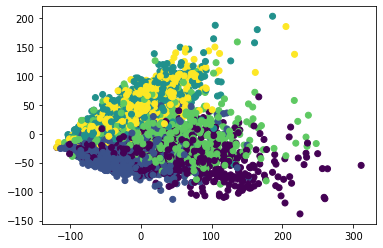

In [ ]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

## MLP Classifier

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                ##################################
                # you should implement this part #
                ##################################
                raise NotImplementedError
        return self
    
    def eval(self, X_test, y_test):
        ##################################
        # you should implement this part #
        ##################################
        raise NotImplementedError

## Autoencoder

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


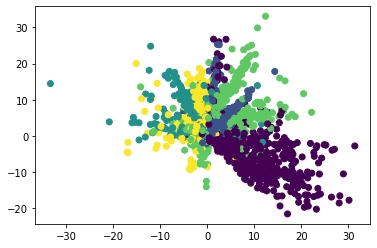

In [ ]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

#### Q23

In [ ]:
from sklearn.manifold import TSNE

tsne_result = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(f_all)
tsne_result.shape

(3670, 2)

In [ ]:
y_all.shape

(3670,)

In [7]:
import pandas as pd
import seaborn as sns

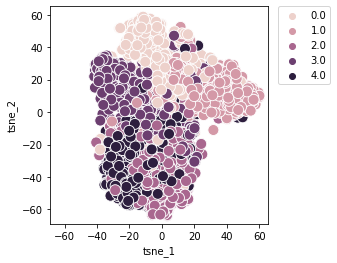

In [ ]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_all})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


#### Q24

In [8]:
from sklearn.cluster import KMeans,  AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import TruncatedSVD

In [ ]:
# svd with k-Means
svd = TruncatedSVD(n_components = 50, random_state = 0) 
X_f_all_svd = svd.fit_transform(f_all)

# Apply K-means clustering with k = 5
km_svd = KMeans(n_clusters=5, random_state=0,  max_iter=10000, n_init=1000) 
km_svd.fit(X_f_all_svd)

print("Result of SVD with K-Means:")
print("Homogeneity score is: ", homogeneity_score(y_all,km_svd.labels_))
print("Completeness score is: ", completeness_score(y_all,km_svd.labels_))
print("V-measure score is: ", v_measure_score(y_all,km_svd.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,km_svd.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,km_svd.labels_))

Result of SVD with K-Means:
Homogeneity score is:  0.3287748259529479
Completeness score is:  0.3639128610197896
V-measure score is:  0.3454526182404325
Adjusted rand index score is:  0.1927435403368653
Adjusted mutual information score is:  0.3445122511344869


In [ ]:
# svd with Agglomerative Clustering
svd = TruncatedSVD(n_components = 50, random_state = 0) 
X_f_all_svd = svd.fit_transform(f_all)

AgC = AgglomerativeClustering(n_clusters=5).fit(X_f_all_svd)

print("Result of SVD with Agglomerative Clustering:")
print("Homogeneity score is: ", homogeneity_score(y_all,AgC.labels_))
print("Completeness score is: ", completeness_score(y_all,AgC.labels_))
print("V-measure score is: ", v_measure_score(y_all,AgC.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,AgC.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,AgC.labels_))

Result of SVD with Agglomerative Clustering:
Homogeneity score is:  0.328272507647256
Completeness score is:  0.38171696765390134
V-measure score is:  0.3529832217022681
Adjusted rand index score is:  0.18625517752993817
Adjusted mutual information score is:  0.35203148188501765


In [ ]:
# svd with HDBSCAN
svd = TruncatedSVD(n_components = 50, random_state = 0) 
X_f_all_svd = svd.fit_transform(f_all)
HDB = hdbscan.HDBSCAN(min_cluster_size=100,min_samples=100).fit_predict(X_f_all_svd)

print("Result of SVD with HDBSCAN:")
print("Homogeneity score is: ", homogeneity_score(y_all,HDB))
print("Completeness score is: ", completeness_score(y_all,HDB))
print("V-measure score is: ", v_measure_score(y_all,HDB))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,HDB))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,HDB))


Result of SVD with HDBSCAN:
Homogeneity score is:  2.0815080777064365e-16
Completeness score is:  1.0
V-measure score is:  4.163016155412872e-16
Adjusted rand index score is:  0.0
Adjusted mutual information score is:  2.8509665587477824e-17


In [ ]:
# umap 
Umap = umap.UMAP(n_components=50)
Umap_50 = Umap.fit_transform(f_all)

In [ ]:
# umap with k-Means
km_umap = KMeans(n_clusters=5, random_state=0,  max_iter=10000, n_init=1000) 
km_umap.fit(Umap_50)

print("Result of umap with K-Means:")
print("Homogeneity score is: ", homogeneity_score(y_all,km_umap.labels_))
print("Completeness score is: ", completeness_score(y_all,km_umap.labels_))
print("V-measure score is: ", v_measure_score(y_all,km_umap.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,km_umap.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,km_umap.labels_))


Result of umap with K-Means:
Homogeneity score is:  0.4910761869705012
Completeness score is:  0.5049722067995933
V-measure score is:  0.4979272641615479
Adjusted rand index score is:  0.4162350403812165
Adjusted mutual information score is:  0.4972315033577073


In [ ]:
# umap with Agglomerative Clustering
AgC_umap = AgglomerativeClustering(n_clusters=5).fit(Umap_50)

print("Result of umap with Agglomerative Clustering:")
print("Homogeneity score is: ", homogeneity_score(y_all,AgC_umap.labels_))
print("Completeness score is: ", completeness_score(y_all,AgC_umap.labels_))
print("V-measure score is: ", v_measure_score(y_all,AgC_umap.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,AgC_umap.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,AgC_umap.labels_))

Result of umap with Agglomerative Clustering:
Homogeneity score is:  0.4767375797162073
Completeness score is:  0.4969192233047388
V-measure score is:  0.48661924221703884
Adjusted rand index score is:  0.38973936467843
Adjusted mutual information score is:  0.4859029868731153


In [ ]:
# umap with HDBSCAN
HDB_umap = hdbscan.HDBSCAN(min_cluster_size=100,min_samples=100).fit_predict(Umap_50)

print("Result of umap with HDBSCAN:")
print("Homogeneity score is: ", homogeneity_score(y_all,HDB_umap))
print("Completeness score is: ", completeness_score(y_all,HDB_umap))
print("V-measure score is: ", v_measure_score(y_all,HDB_umap))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,HDB_umap))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,HDB_umap))

Result of umap with HDBSCAN:
Homogeneity score is:  0.38291011056051033
Completeness score is:  0.4080239357172176
V-measure score is:  0.39506831466439013
Adjusted rand index score is:  0.20318610571482634
Adjusted mutual information score is:  0.3939999923960274


In [ ]:
# autoencoder
Aten =Autoencoder(50).fit_transform(f_all)

100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


In [ ]:
# autoencoder with k-Means
km_auto = KMeans(n_clusters=5, random_state=0,  max_iter=10000, n_init=1000) 
km_auto.fit(Aten)

print("Result of auto with K-Means:")
print("Homogeneity score is: ", homogeneity_score(y_all,km_auto.labels_))
print("Completeness score is: ", completeness_score(y_all,km_auto.labels_))
print("V-measure score is: ", v_measure_score(y_all,km_auto.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,km_auto.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,km_auto.labels_))

Result of auto with K-Means:
Homogeneity score is:  0.27451629313732623
Completeness score is:  0.304772031913542
V-measure score is:  0.28885404671495735
Adjusted rand index score is:  0.1944606202342707
Adjusted mutual information score is:  0.2878303285238757


In [ ]:
# autoencoder with Agglomerative Clustering
AgC_auto = AgglomerativeClustering(n_clusters=5).fit(Aten)

print("Result of auto with Agglomerative Clustering:")
print("Homogeneity score is: ", homogeneity_score(y_all,AgC_auto.labels_))
print("Completeness score is: ", completeness_score(y_all,AgC_auto.labels_))
print("V-measure score is: ", v_measure_score(y_all,AgC_auto.labels_))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,AgC_auto.labels_))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,AgC_auto.labels_))

Result of auto with Agglomerative Clustering:
Homogeneity score is:  0.27082047513266394
Completeness score is:  0.33196426963909237
V-measure score is:  0.29829129555947315
Adjusted rand index score is:  0.20767842052278504
Adjusted mutual information score is:  0.2972320527697892


In [ ]:
# auto with HDBSCAN
HDB_auto = hdbscan.HDBSCAN(min_cluster_size=100,min_samples=100).fit_predict(Aten)

print("Result of auto with HDBSCAN:")
print("Homogeneity score is: ", homogeneity_score(y_all,HDB_auto))
print("Completeness score is: ", completeness_score(y_all,HDB_auto))
print("V-measure score is: ", v_measure_score(y_all,HDB_auto))
print("Adjusted rand index score is: ", adjusted_rand_score(y_all,HDB_auto))
print("Adjusted mutual information score is: ", adjusted_mutual_info_score(y_all,HDB_auto))

Result of auto with HDBSCAN:
Homogeneity score is:  2.0815080777064365e-16
Completeness score is:  1.0
V-measure score is:  4.163016155412872e-16
Adjusted rand index score is:  0.0
Adjusted mutual information score is:  2.8509665587477824e-17


In [12]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                ##################################
                # you should implement this part #
                ##################################
                X_cuba = X_.cuda()
                # ===================forward=====================
                output = self(X_cuba)
                loss = criterion(output,y_.cuda())
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self
    
    def eval(self, X_test, y_test):
        ##################################
        # you should implement this part #
        ##################################
        X_pred = self(torch.tensor(X_test,dtype=torch.float32, device='cuda'))
        log = X_pred.argmax(dim=1)
  
        # accuracy
        
        sum = torch.sum(log == torch.tensor(y_test,dtype=torch.float32, device='cuda'))
        acc = sum /X_test.shape[0]
        with torch.no_grad():
          acc = acc.cpu().numpy()

        return acc

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.2, random_state=42)

#### original VGG features

In [13]:
model = MLP(4096)
model.train(X_train, y_train)
acc = model.eval(X_test, y_test)
print("\nAccuracy: ", acc)

100%|██████████| 100/100 [00:08<00:00, 11.50it/s]



Accuracy:  0.88964576


#### using the reduced-dimension features Umap

In [25]:
def umap_reduced_model(dimension, f_all, y_all):
  Umap = umap.UMAP(n_components=dimension,metric='cosine')
  Umap_trans = Umap.fit_transform(f_all)

  # MLP
  X_train, X_test, y_train, y_test = train_test_split(Umap_trans, y_all, test_size=0.2, random_state=42)
  model = MLP(dimension)
  model.train(X_train, y_train)
  acc = model.eval(X_test, y_test)
  print(f"\nAccuracy with dimension {dimension}: ", acc)


In [23]:
umap_dim = [100,50,20,10,9,8,7,6,5,4,3,2,1]

In [28]:
for i in umap_dim:
  umap_reduced_model(i, f_all, y_all)

100%|██████████| 100/100 [00:07<00:00, 12.79it/s]



Accuracy with dimension 100:  0.78474116


100%|██████████| 100/100 [00:11<00:00,  8.60it/s]



Accuracy with dimension 50:  0.82970023


100%|██████████| 100/100 [00:10<00:00,  9.35it/s]



Accuracy with dimension 20:  0.84196186


100%|██████████| 100/100 [00:10<00:00,  9.45it/s]



Accuracy with dimension 10:  0.8446866


100%|██████████| 100/100 [00:14<00:00,  6.74it/s]



Accuracy with dimension 9:  0.8405994


100%|██████████| 100/100 [00:06<00:00, 15.59it/s]



Accuracy with dimension 8:  0.82970023


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]



Accuracy with dimension 7:  0.83787465


100%|██████████| 100/100 [00:09<00:00, 10.07it/s]



Accuracy with dimension 6:  0.8555858


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]



Accuracy with dimension 5:  0.83787465


100%|██████████| 100/100 [00:11<00:00,  8.76it/s]



Accuracy with dimension 4:  0.83787465


100%|██████████| 100/100 [00:09<00:00, 10.46it/s]



Accuracy with dimension 3:  0.8242507


100%|██████████| 100/100 [00:09<00:00, 11.04it/s]



Accuracy with dimension 2:  0.8188011


100%|██████████| 100/100 [00:10<00:00,  9.55it/s]


Accuracy with dimension 1:  0.78201634
